In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
sns.set_palette("bright")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/china-scholarship-data-may-2019/cleaned.csv


# Data Understanding

In [2]:
df = pd.read_csv('/kaggle/input/china-scholarship-data-may-2019/cleaned.csv')
df.head()

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH


In [3]:
df.shape

(3576, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   schol_id                 3576 non-null   int64  
 1   University               3576 non-null   object 
 2   Major                    3576 non-null   object 
 3   Level                    3576 non-null   object 
 4   Language                 3576 non-null   object 
 5   Tuition Covered          3453 non-null   float64
 6   Accomodation covered?    3576 non-null   int64  
 7   Living Expense Covered?  3576 non-null   int64  
 8   Tuition fees to pay      3576 non-null   int64  
 9   Original Tuition fee     3453 non-null   float64
 10  Start_Month              3576 non-null   object 
 11  Start_Year               3576 non-null   int64  
 12  Accomodation_To_Pay      3576 non-null   float64
 13  Accomodation_duration    3576 non-null   object 
 14  Expense_To_Pay          

In [5]:
df.describe().T.drop("count", axis=1).T

,schol_id,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Year,Accomodation_To_Pay,Expense_To_Pay
mean,1816.503076,20531.704315,0.232942,0.251119,8433.516499,28693.955980,2019.056208,1376.461969,1070.987136
std,1034.126355,12428.124918,0.422765,0.433717,9519.340675,15341.450293,0.230355,2802.526970,601.297528
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000
25%,923.750000,10625.000000,0.000000,0.000000,0.000000,20000.000000,2019.000000,400.000000,1000.000000
50%,1817.500000,20000.000000,0.000000,0.000000,6000.000000,26500.000000,2019.000000,900.000000,1000.000000
75%,2711.250000,26500.000000,0.000000,1.000000,11000.000000,34000.000000,2019.000000,1200.000000,1500.000000
max,3605.000000,80000.000000,1.000000,1.000000,69000.000000,148000.000000,2020.000000,24000.000000,2700.000000


In [6]:
df.describe(include=object).T.drop("count", axis=1).T

,University,Major,Level,Language,Start_Month,Accomodation_duration,Expense_duration
unique,53,1249,4,4,5,6,1
top,Zhejiang Normal University,Computer Science and Technology,Master,Chinese,Sep,MONTH,MONTH
freq,402,54,1461,2395,3551,2575,3576


# Data Preprocessing

In [7]:
df.isna().sum()

schol_id                     0
University                   0
Major                        0
Level                        0
Language                     0
Tuition Covered            123
Accomodation covered?        0
Living Expense Covered?      0
Tuition fees to pay          0
Original Tuition fee       123
Start_Month                  0
Start_Year                   0
Accomodation_To_Pay          0
Accomodation_duration        0
Expense_To_Pay               0
Expense_duration             0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

/tmp/ipykernel_21/488824891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<function matplotlib.pyplot.show(close=None, block=None)>

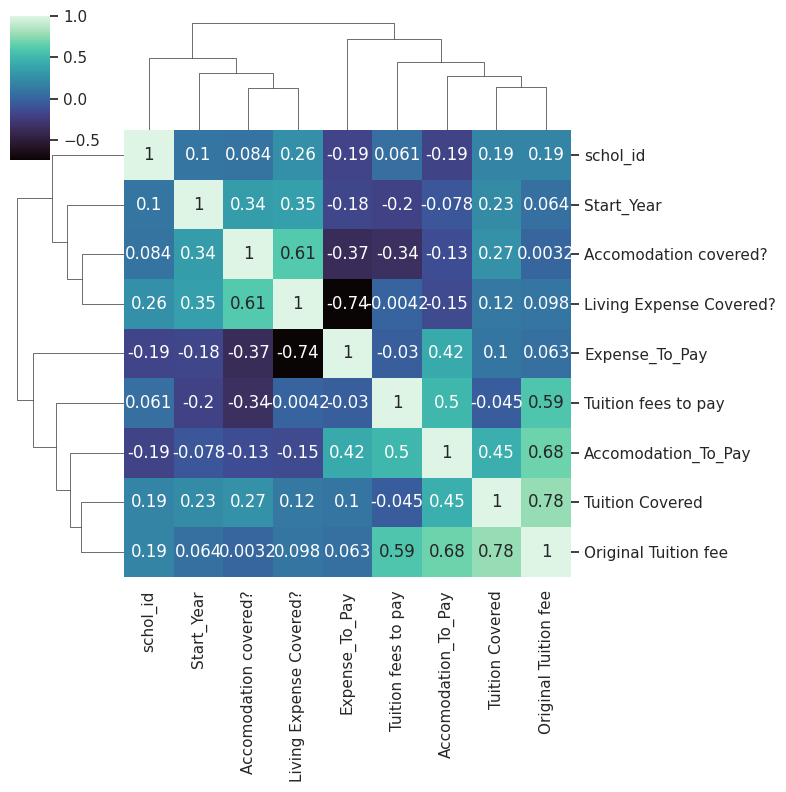

In [10]:
sns.clustermap(
    df.corr(),
    annot=True,
    cmap='mako',
    figsize=(8, 8)
)
plt.show

# Feature Engineering

In [11]:
#Create Column Category Tuition Covered?
df['Tuition Covered?'] = df['Tuition Covered'].apply(lambda x: 1 if x > 0 else 0)
df['Tuition Covered?'] = df['Tuition Covered?'].astype(int)

# Groupping for Create Scholarship Category
df.loc[(df["Tuition Covered?"] == 1) & (df["Accomodation covered?"] == 1) & (df["Living Expense Covered?"] == 1), "Scholarship Category"] = "Fully Covered"
df.loc[(df["Tuition Covered?"] == 1) & (df["Accomodation covered?"] == 1) & (df["Living Expense Covered?"] == 0), "Scholarship Category"] = "Tuition and Accomodation Covered"
df.loc[(df["Tuition Covered?"] == 1) & (df["Accomodation covered?"] == 0) & (df["Living Expense Covered?"] == 1), "Scholarship Category"] = "Tuition and Living Covered"
df.loc[(df["Tuition Covered?"] == 0) & (df["Accomodation covered?"] == 1) & (df["Living Expense Covered?"] == 1), "Scholarship Category"] = "Accomodation and Living Expense Covered"
df.loc[(df["Tuition Covered?"] == 0) & (df["Accomodation covered?"] == 1) & (df["Living Expense Covered?"] == 0), "Scholarship Category"] = "Accomodation Covered"
df.loc[(df["Tuition Covered?"] == 0) & (df["Accomodation covered?"] == 0) & (df["Living Expense Covered?"] == 1), "Scholarship Category"] = "Living Expense Covered"
df.loc[(df["Tuition Covered?"] == 1) & (df["Accomodation covered?"] == 0) & (df["Living Expense Covered?"] == 0), "Scholarship Category"] = "Tuition Covered"
df.loc[(df["Tuition Covered?"] == 0) & (df["Accomodation covered?"] == 0) & (df["Living Expense Covered?"] == 0), "Scholarship Category"] = "Not Fully Covered"

#Create column for Total Accomodation in Year
convert_to_month = {'YEAR' : 1, 'SEMESTER' : 2, 'TERM' : 3, 'MONTH':12,'DAY': 365}
df['Accomodation_duration'] = df['Accomodation_duration'].replace(convert_to_month)
df['Accomodation_duration'] = df['Accomodation_duration'].astype(int)
df['total_accomodation_year'] = df['Accomodation_duration'] * df['Accomodation_To_Pay']
#Create Column for Total Expense Year
convert_to_num = {'MONTH':12}
df['Expense_duration'] = df['Expense_duration'].replace(convert_to_month)
df['Expense_duration'] = df['Expense_duration'].astype(int)
df['total_expense_year'] = df['Expense_duration'] * df['Expense_To_Pay']
#Create Total Cost Year Without Coverage
df['total_cost_year'] = df['Tuition fees to pay'] + df['total_accomodation_year'] + df['total_expense_year']

#Remove text
df['Major'] = df['Major'].str.replace(r"\(.*\)","").str.strip()
df['Major'] = df['Major'].replace('[^a-zA-Z ]', '', regex=True)

/tmp/ipykernel_21/3476468618.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Major'] = df['Major'].str.replace(r"\(.*\)","").str.strip()


# Reasoning for Feature Engineering

* The Scholarship Category column was created to facilitate analysis of the types of scholarships awarded in the dataset. This makes it possible to understand more about the types of scholarships present in the dataset and helps in a more detailed analysis of how much impact the scholarship has on the total cost to be borne by the student.
* By grouping the cost of accommodation and living expenses for one year, we can easily compare the total costs that must be borne by students each year, and also compare costs between universities.
* Removing text inside parentheses in the Major column may be done to facilitate the data analysis process. Sometimes in columns like this, there is additional information or description that is not needed for analysis, such as specific information about courses or majors, study program codes, or specific education levels. By removing the text inside the parentheses, the Major column becomes easier to read and understand

# Distribution University 

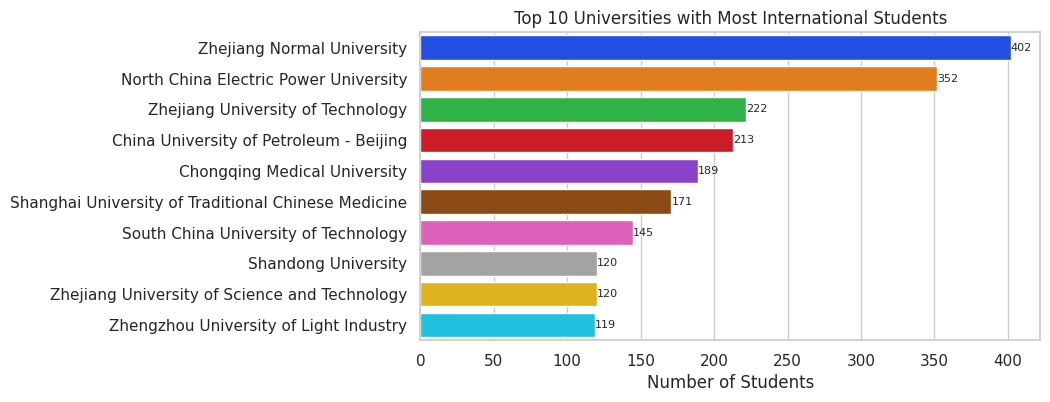

In [12]:
uni = df['University'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
ax = sns.barplot(x=uni.values, y=uni.index)
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.xlabel('Number of Students')
plt.title('Top 10 Universities with Most International Students')
plt.show()

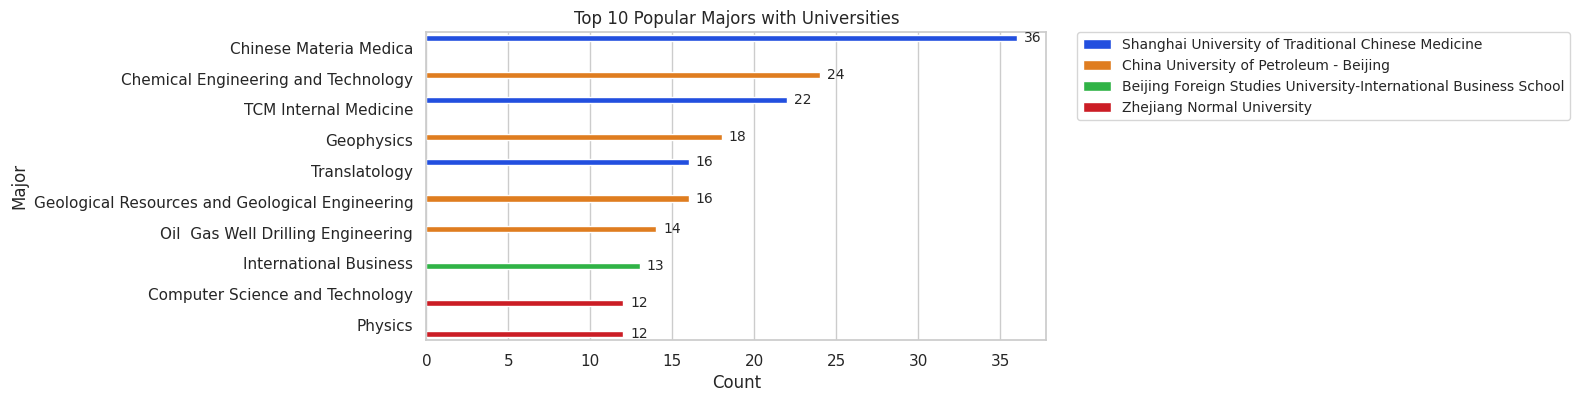

In [13]:
uni_major_count = df.groupby(['University', 'Major']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Count', y='Major', hue='University', data=uni_major_count)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=5, fontsize=10)
plt.title('Top 10 Popular Majors with Universities')
plt.xlabel('Count')
plt.ylabel('Major')
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


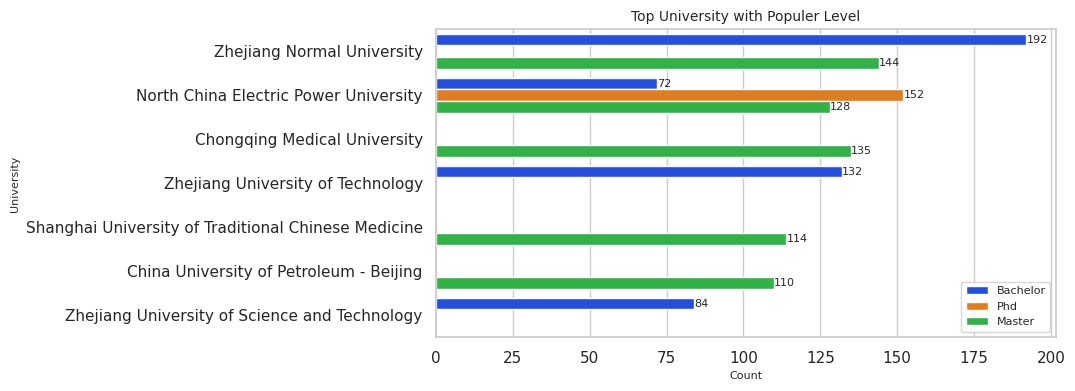

In [14]:
uni_level_count = df.groupby(['University', 'Level']).size().reset_index(name='Count').sort_values('Count', ascending=False).head(10)

# Plot the data using a barplot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=uni_level_count, y='University', x='Count', hue='Level', orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
ax.legend(fontsize=8, loc='lower right')
plt.title('Top University with Populer Level', fontsize=10)
plt.xlabel('Count', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.show()

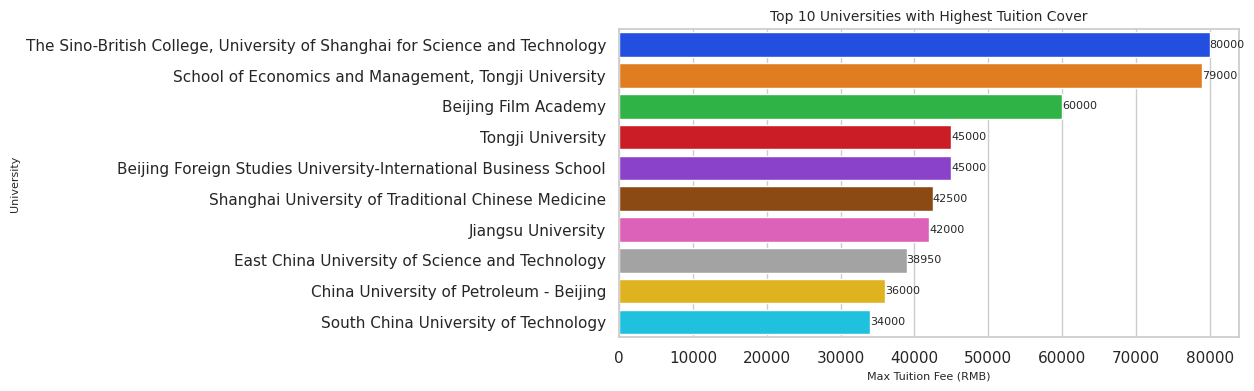

In [15]:
# Group the data by University and calculate the max Tuition Covered
uni_tuition_max = df.groupby('University')['Tuition Covered'].max().reset_index(name='MaxTuitionFee').sort_values('MaxTuitionFee', ascending=False).head(10)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=uni_tuition_max, x='MaxTuitionFee', y='University', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge', fontsize=8)
plt.title('Top 10 Universities with Highest Tuition Cover', fontsize=10)
plt.xlabel('Max Tuition Fee (RMB)', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.show()

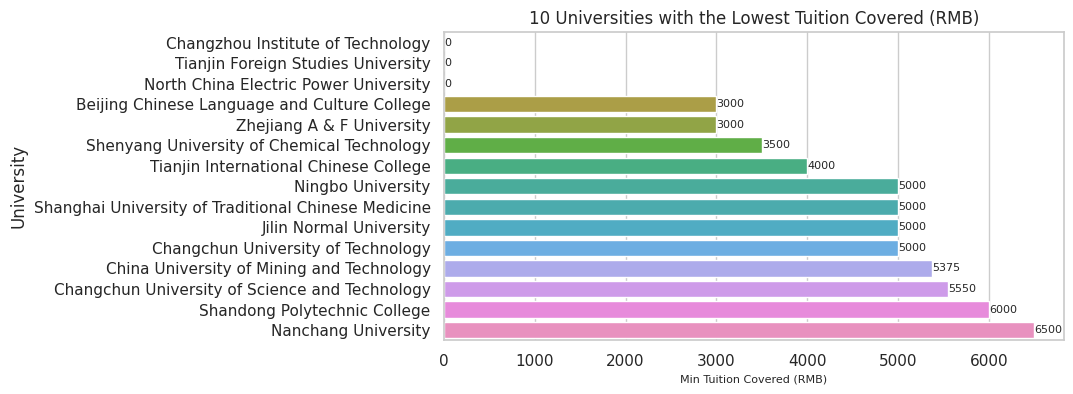

In [16]:
# Groupby University dan ambil nilai rata-rata dari kolom 'Tuition Covered'
uni_tuition_covered = df.groupby('University')['Tuition Covered'].min().reset_index().sort_values(by='Tuition Covered').head(15)
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Tuition Covered', y='University', data=uni_tuition_covered)
for i in ax.containers:
  ax.bar_label(i, label_type='edge', fontsize=8)
plt.title('10 Universities with the Lowest Tuition Covered (RMB)')
plt.xlabel('Min Tuition Covered (RMB)', fontsize=8)
plt.show()

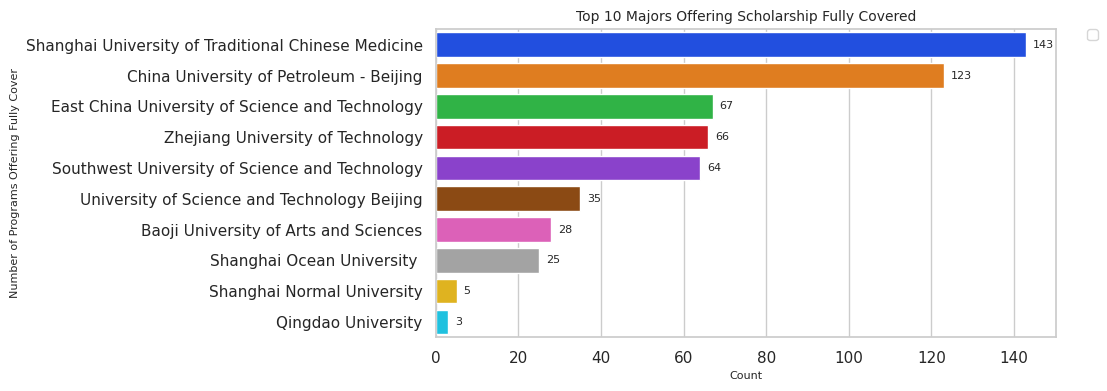

In [17]:
# Groupby University Offering Scholarship Category Fully Covered
uni_scholarship_cover = df[df['Scholarship Category'] == 'Fully Covered'].groupby(['University']).size().reset_index(name='Count').sort_values('Count', ascending=False).head(10)
# Plot the data using a barplot
plt.figure(figsize=(8,4))
ax = sns.barplot(data=uni_scholarship_cover, x='Count', y='University', dodge=False, orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge', fontsize=8, padding=5)
plt.xlabel('Count', fontsize=8)
plt.ylabel('Number of Programs Offering Fully Cover', fontsize=8)
plt.title('Top 10 Majors Offering Scholarship Fully Covered', fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

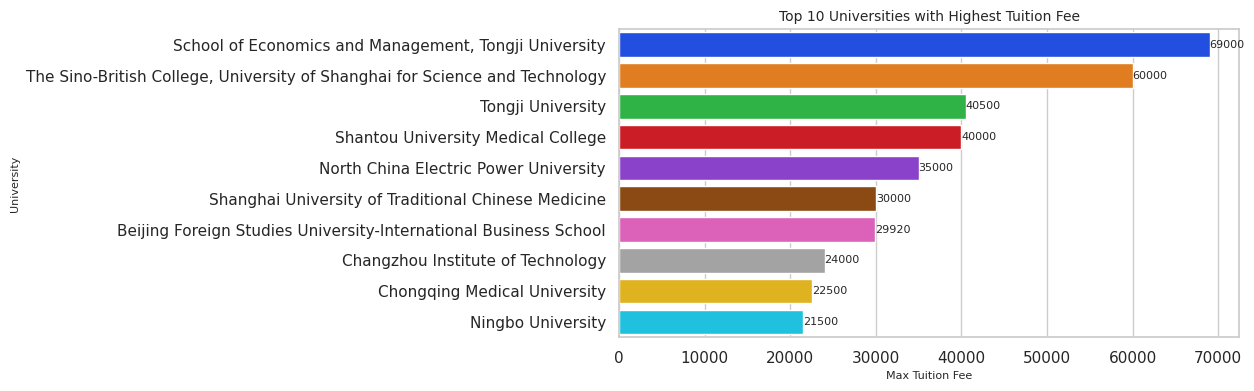

In [18]:
# Group the data by University and calculate the max TuitionFee
uni_tuition_max = df.groupby('University')['Tuition fees to pay'].max().reset_index(name='MaxTuitionFee').sort_values('MaxTuitionFee', ascending=False).head(10)
# Plot the data using a h barplot
plt.figure(figsize=(8,4))
ax = sns.barplot(data=uni_tuition_max, x='MaxTuitionFee', y='University', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Top 10 Universities with Highest Tuition Fee', fontsize=10)
plt.xlabel('Max Tuition Fee', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.show()

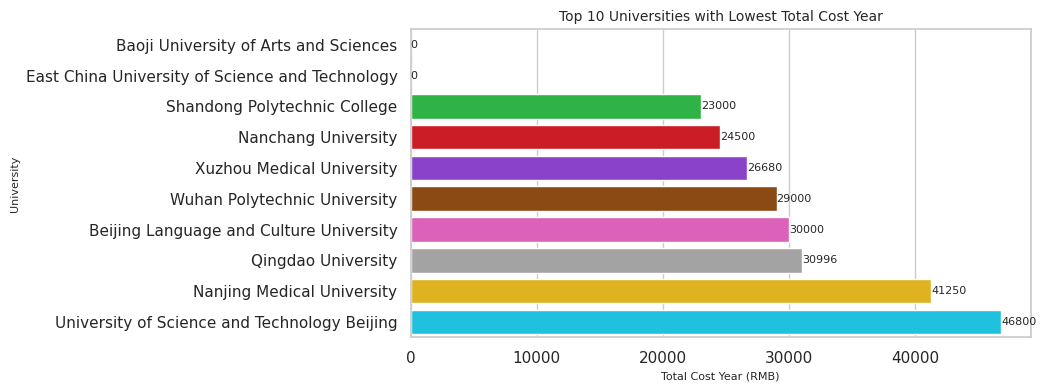

In [19]:
uni_total_cost_year = df.groupby('University')['total_cost_year'].sum().reset_index(name='TotalCostYear').sort_values('TotalCostYear').head(10)
# Plot the data using a h barplot
plt.figure(figsize=(8,4))
ax = sns.barplot(data=uni_total_cost_year, x='TotalCostYear', y='University', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Top 10 Universities with Lowest Total Cost Year', fontsize=10)
plt.xlabel('Total Cost Year (RMB)', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.show()

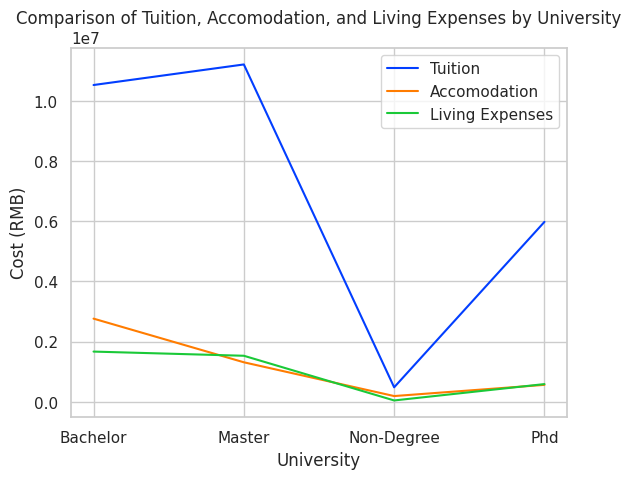

In [20]:
# Group data by university and calculate the mean of each cost category
cost_data = df.groupby('Level')[['Tuition fees to pay', 'Accomodation_To_Pay', 'Expense_To_Pay']].sum()

# Create a line chart for each cost category
plt.plot(cost_data['Tuition fees to pay'], label='Tuition')
plt.plot(cost_data['Accomodation_To_Pay'], label='Accomodation')
plt.plot(cost_data['Expense_To_Pay'], label='Living Expenses')
# Set the title and axis labels
plt.title('Comparison of Tuition, Accomodation, and Living Expenses by University')
plt.xlabel('University')
plt.ylabel('Cost (RMB)')

# Add legend and show the plot
plt.legend()
plt.show()

# Insight in University

* From the distribution of universities mentioned,  Zhejiang Normal University and North China Electric Power University are among the top choices for international students due to the number of international students enrolled. Additionally, Shanghai University of Traditional Medicine and China University of Petroleum offer majors that are popular among international students. 

* Furthermore, Zhejiang Normal University offers the most Bachelor's and Master's degrees, while North China Electric Power University provides the most Ph.D. degree offerings. On the other hand, Shanghai University of Traditional Medicine provides the most Fully Covered scholarships, indicating that it is an attractive option for those seeking financial aid. 

* The findings suggest that Bachelor's and Master's degrees have the highest associated costs, while the Non-Degree level has the lowest. However, it is worth noting that some universities such as Baoji University of Arts and Sciences and East China University of Science and Technology offer Fully Covered and Total Cost Year 0, which ensures that all expenses (Tuition Covered, Accommodation Covered, and Living Expenses) are taken care of.


# Distribution Major

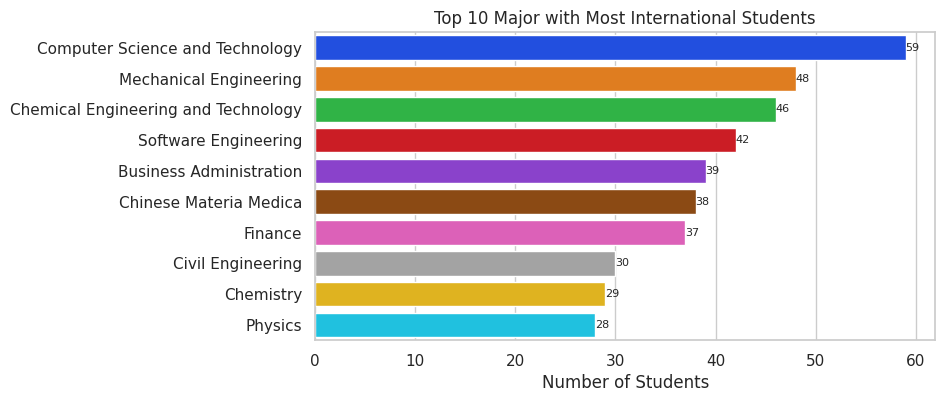

In [21]:
uni = df['Major'].value_counts()
top10_major = uni[:10]
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
ax = sns.barplot(x=top10_major.values,y=top10_major.index)
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.xlabel('Number of Students')
plt.title('Top 10 Major with Most International Students')
plt.show()

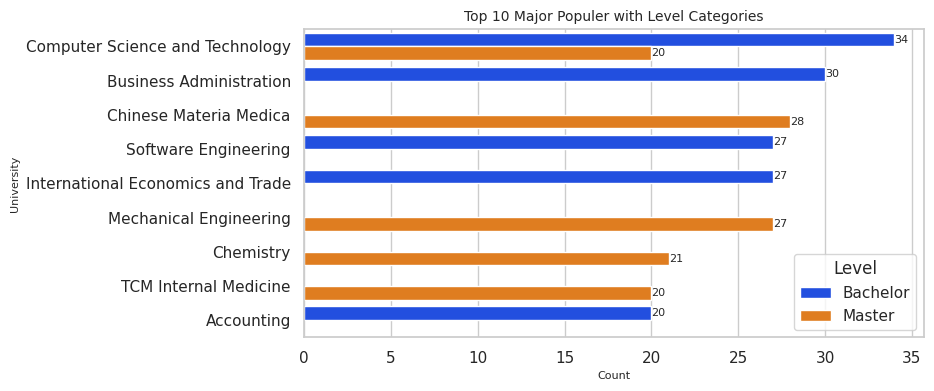

In [22]:
maj_level_count = df.groupby(['Major', 'Level']).size().reset_index(name='Count').sort_values('Count', ascending=False).head(10)
plt.figure(figsize=(8,4))
ax = sns.barplot(data=maj_level_count, y='Major', x='Count', hue='Level', orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.title('Top 10 Major Populer with Level Categories', fontsize=10)
plt.xlabel('Count', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.show()

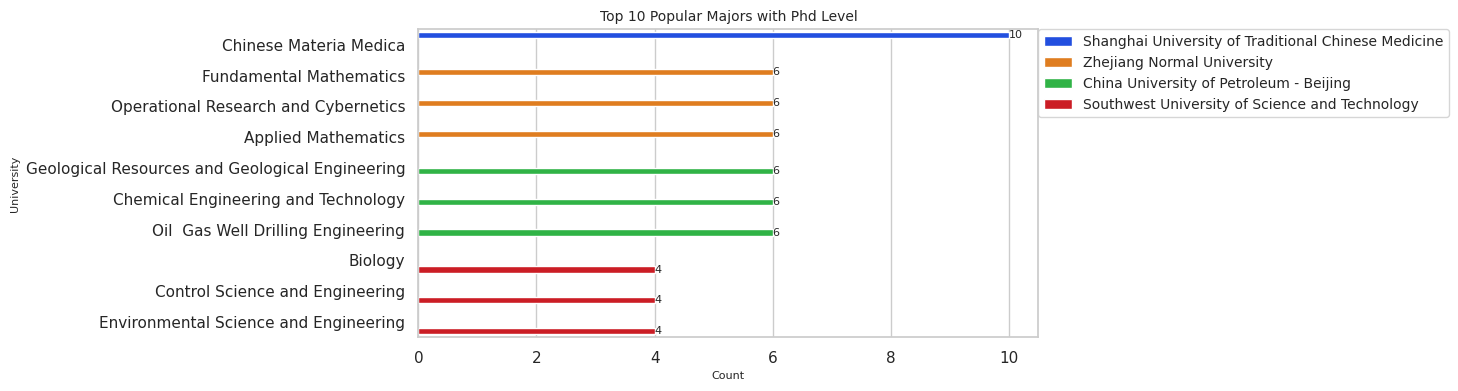

In [23]:
maj_phd_count = df[df['Level']=='Phd'].groupby(['Major', 'Level','University']).size().reset_index(name='Count').sort_values('Count', ascending=False).head(10)
plt.figure(figsize=(8,4))
ax = sns.barplot(data=maj_phd_count, y='Major', x='Count', hue='University', orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.title('Top 10 Popular Majors with Phd Level', fontsize=10)
plt.xlabel('Count', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.legend(fontsize=10, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

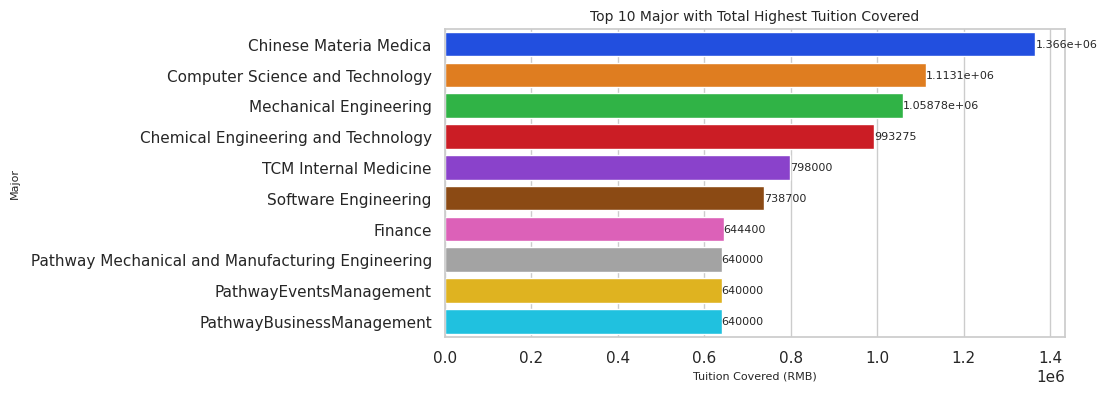

In [24]:
# Group by major and calculate the sum of tuition covered
maj_tuition_fee = df.groupby('Major')['Tuition Covered'].sum().reset_index().sort_values('Tuition Covered', ascending=False).head(10)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=maj_tuition_fee, y='Major', x='Tuition Covered', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Top 10 Major with Total Highest Tuition Covered', fontsize=10)
plt.xlabel('Tuition Covered (RMB)', fontsize=8)
plt.ylabel('Major', fontsize=8)
plt.show()

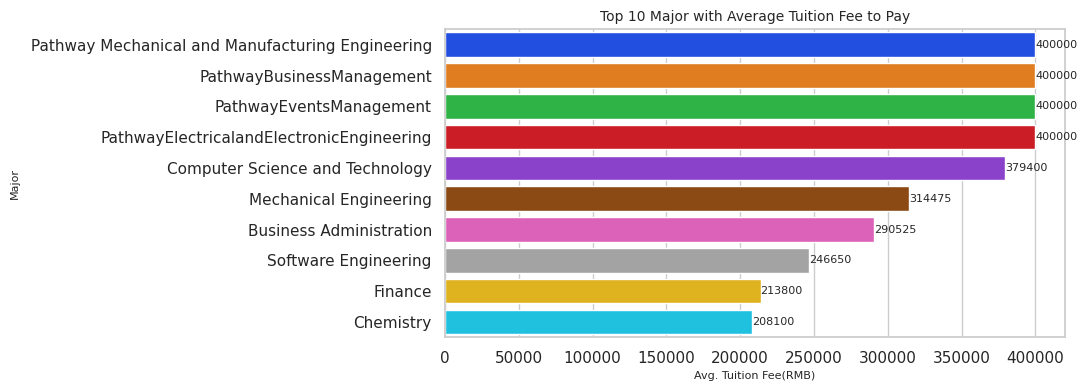

In [25]:
# Group the data by Major and calculate the max TuitionFee
maj_tuition_mean = df.groupby('Major')['Tuition fees to pay'].sum().reset_index(name='MajTuitionFee').sort_values('MajTuitionFee', ascending=False).head(10)
# Plot the data using a h barplot
plt.figure(figsize=(8,4))
ax = sns.barplot(data=maj_tuition_mean, x='MajTuitionFee', y='Major', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Top 10 Major with Average Tuition Fee to Pay', fontsize=10)
plt.xlabel('Avg. Tuition Fee(RMB)', fontsize=8)
plt.ylabel('Major', fontsize=8)
plt.show()

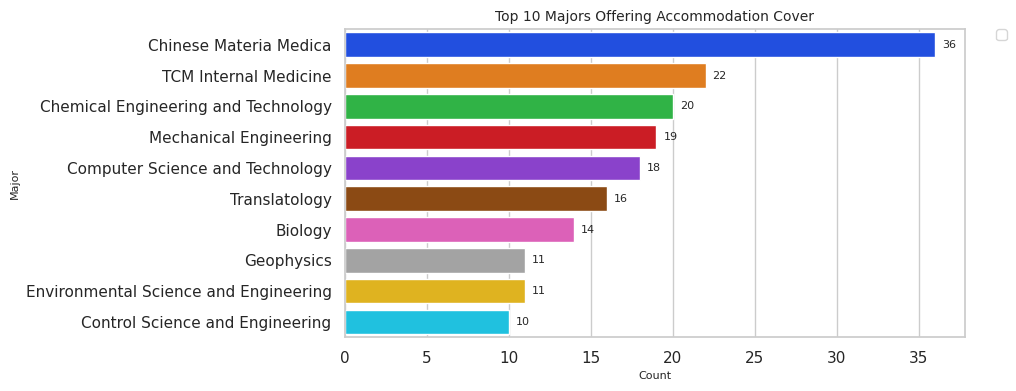

In [26]:
# Groupby Major Programs Offering accommodation cover
major_accommodation_cover = df[df['Accomodation covered?'] == 1].groupby(['Major']).size().reset_index(name='Count').sort_values('Count', ascending=False).head(10)
# Plot the data using a barplot
plt.figure(figsize=(8,4))
ax = sns.barplot(data=major_accommodation_cover, x='Count', y='Major', dodge=False, orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge', fontsize=8, padding=5)
plt.xlabel('Count', fontsize=8)
plt.ylabel('Major', fontsize=8)
plt.title('Top 10 Majors Offering Accommodation Cover', fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

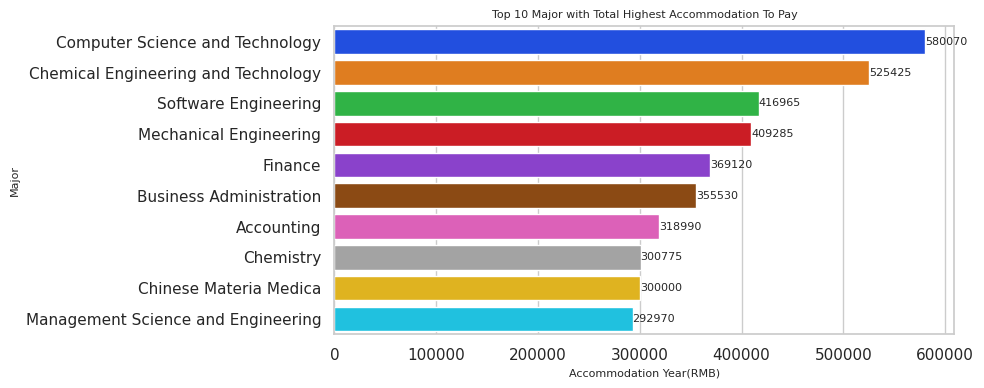

In [27]:
# Group data by major and calculate the sum of accommodation covered
major_accomodation = df.groupby('Major')['total_accomodation_year'].sum().reset_index().sort_values('total_accomodation_year', ascending=False).head(10)
# Create a h bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=major_accomodation, y='Major', x='total_accomodation_year', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Top 10 Major with Total Highest Accommodation To Pay', fontsize=8)
plt.xlabel('Accommodation Year(RMB)', fontsize=8)
plt.ylabel('Major', fontsize=8)
plt.show()

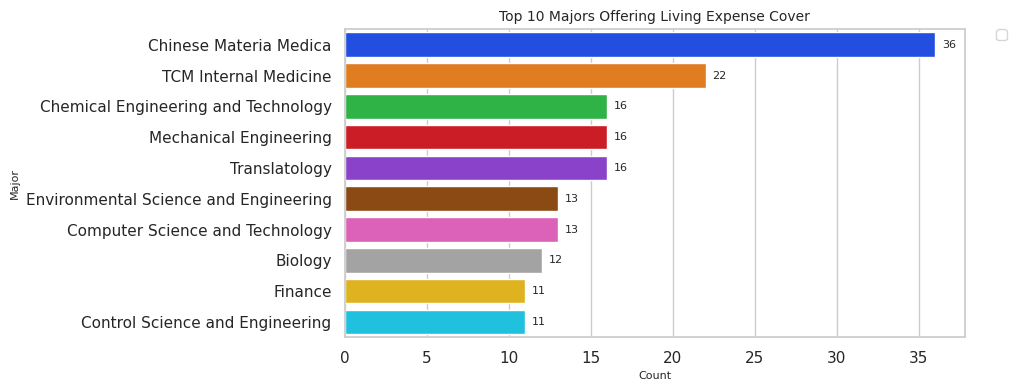

In [28]:
# Groupby Major Programs Offering Living Cover
major_living_cover = df[df['Living Expense Covered?'] == 1].groupby(['Major']).size().reset_index(name='Count').sort_values('Count', ascending=False).head(10)
# Plot the data using a barplot
plt.figure(figsize=(8,4))
ax = sns.barplot(data=major_living_cover, x='Count', y='Major', dodge=False, orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge', fontsize=8, padding=5)
plt.xlabel('Count', fontsize=8)
plt.ylabel('Major', fontsize=8)
plt.title('Top 10 Majors Offering Living Expense Cover', fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

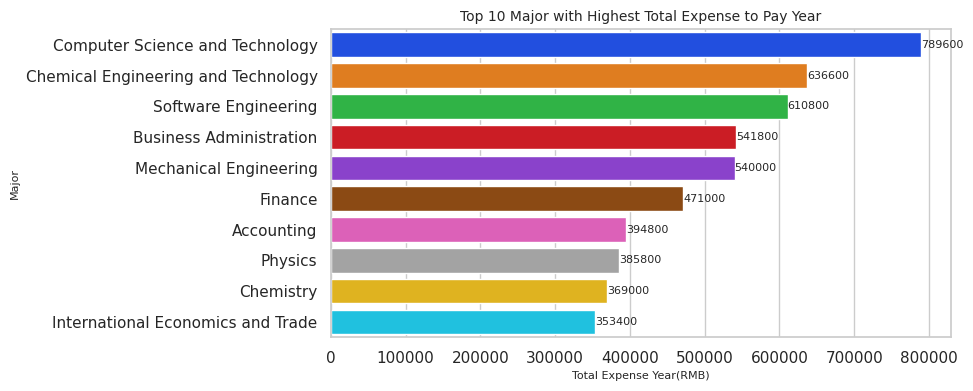

In [29]:
# Group data by major and calculate the sum of Total Expense Year
major_living = df.groupby('Major')['total_expense_year'].sum().reset_index().sort_values('total_expense_year', ascending=False).head(10)
# Create a h bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=major_living, y='Major', x='total_expense_year', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Top 10 Major with Highest Total Expense to Pay Year', fontsize=10)
plt.xlabel('Total Expense Year(RMB)', fontsize=8)
plt.ylabel('Major', fontsize=8)
plt.show()

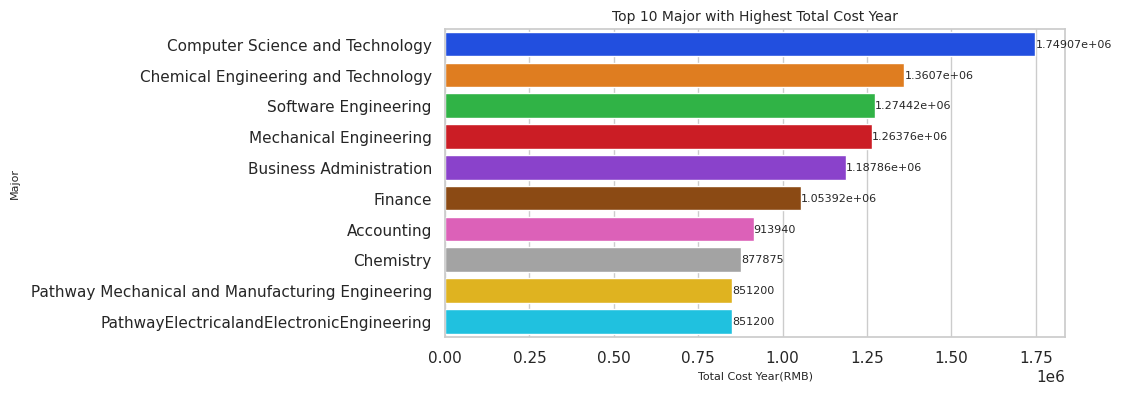

In [30]:
# Group data by major and calculate the sum of Total Cost Year
major_living_cost = df.groupby('Major')['total_cost_year'].sum().reset_index().sort_values('total_cost_year', ascending=False).head(10)
# Create a h bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=major_living_cost, y='Major', x='total_cost_year', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Top 10 Major with Highest Total Cost Year', fontsize=10)
plt.xlabel('Total Cost Year(RMB)', fontsize=8)
plt.ylabel('Major', fontsize=8)
plt.show()

# Insight in Major

* From the distribution of the Major column, it can be concluded that Computer Science and Technology and Mechanical Engineering are the most popular majors with the highest number of students, with 59 and 48 students respectively. Computer Science and Technology also offers the most levels, ranging from Bachelor's to Master's degrees, while Mechanical Engineering only offers the Master's degree level.
* Additionally, Chinese Materia Medica is also one of the most sought-after majors with 28 Master's degree students and 10 PhD students. It is also worth noting that Chinese Materia Medica offers the highest number of Tuition Covered, Accommodation Covered, and Living Covered scholarships compared to other majors.
* Although Computer Science and Technology and Mechanical Engineering are the most popular majors, it is important to consider other majors such as Chinese Materia Medica, as it offers a wide range of scholarships and opportunities for students pursuing this field of study.

# Distribution Level

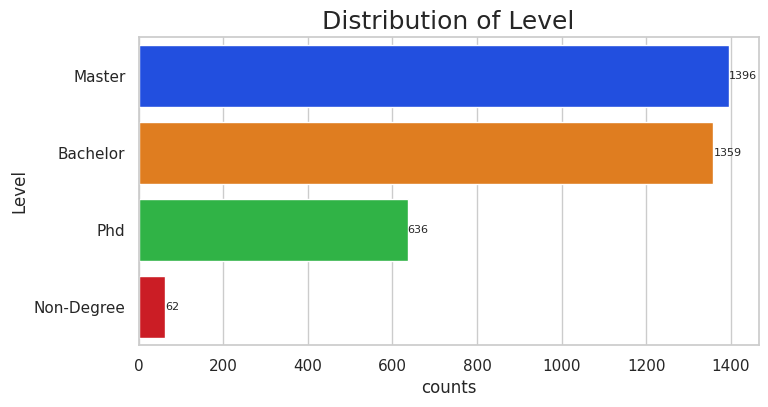

In [31]:
lev = df.groupby('Level').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=lev, x='counts', y='Level',orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.title('Distribution of Level', fontsize=18)
plt.show()

In [32]:
print('Level With Non Degre\n')
df.loc[df['Level'] == 'Non-Degree', ['University', 'Major','Level']]

Level With Non Degre



,University,Major,Level
0,Shanghai University of Traditional Chinese Med...,Summer School,Non-Degree
1,Changchun University of Science and Technology,Preparatory Program of Humanities Direction,Non-Degree
2,Changchun University of Science and Technology,Preparatory Program of Business Direction,Non-Degree
3,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree
4,Qingdao University,Longterm Chinese Language Program,Non-Degree
...,...,...,...
57,China University of Petroleum - Beijing,Industrial Economics,Non-Degree
58,China University of Petroleum - Beijing,Chinese Language Program,Non-Degree
59,China University of Petroleum - Beijing,Chinese Language Program,Non-Degree
60,China University of Petroleum - Beijing,Geology,Non-Degree


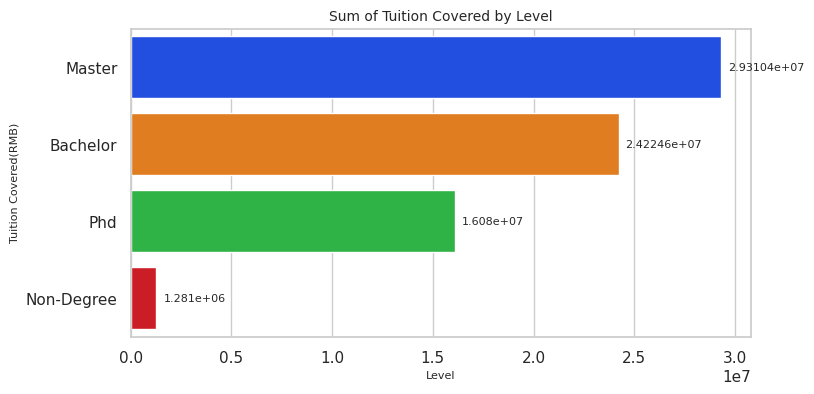

In [33]:
# Groupby Level dan Calculate Tuition Covered
level_tuition_covered = df.groupby('Level')['Tuition Covered'].sum().reset_index().sort_values('Tuition Covered', ascending=False)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=level_tuition_covered, x='Tuition Covered', y='Level', orient='h')
# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8, padding=5)
# Set the title and axis labels
plt.title('Sum of Tuition Covered by Level', fontsize=10)
plt.xlabel('Level', fontsize=8)
plt.ylabel('Tuition Covered(RMB)', fontsize=8)
plt.show()

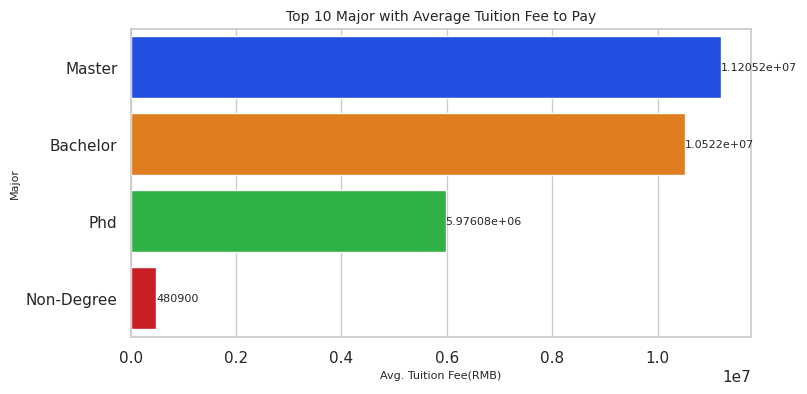

In [34]:
# Group the data by Level and calculate the max TuitionFee
lev_tuition = df.groupby('Level')['Tuition fees to pay'].sum().reset_index(name='MajTuitionFee').sort_values('MajTuitionFee', ascending=False)
# Plot the data using a h barplot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=lev_tuition, x='MajTuitionFee', y='Level', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Top 10 Major with Average Tuition Fee to Pay', fontsize=10)
plt.xlabel('Avg. Tuition Fee(RMB)', fontsize=8)
plt.ylabel('Major', fontsize=8)
plt.show()

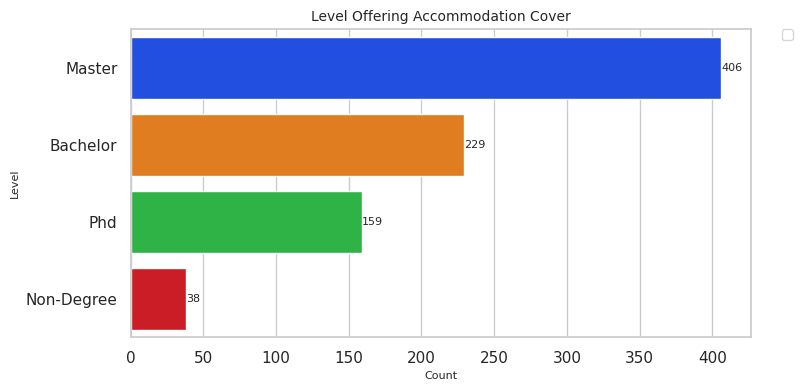

In [35]:
# Groupby Level Offering Accomodation cover
level_accommodation_cover = df[df['Accomodation covered?'] == 1].groupby(['Level']).size().reset_index(name='Count').sort_values('Count', ascending=False)
# Plot the data using a barplot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=level_accommodation_cover, x='Count', y='Level', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.xlabel('Count', fontsize=8)
plt.ylabel('Level', fontsize=8)
plt.title('Level Offering Accommodation Cover', fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

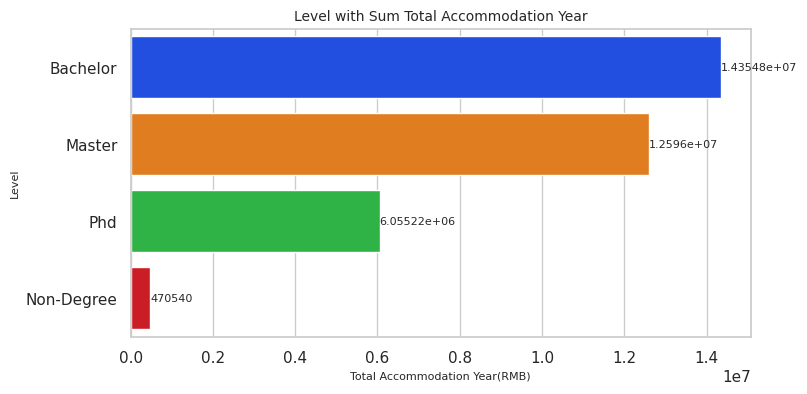

In [36]:
# Group data by Level and calculate the sum of accommodation covered
level_accomodation = df.groupby('Level')['total_accomodation_year'].sum().reset_index().sort_values('total_accomodation_year', ascending=False)
# Create a h bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=level_accomodation, y='Level', x='total_accomodation_year', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Level with Sum Total Accommodation Year', fontsize=10)
plt.xlabel('Total Accommodation Year(RMB)', fontsize=8)
plt.ylabel('Level', fontsize=8)
plt.show()

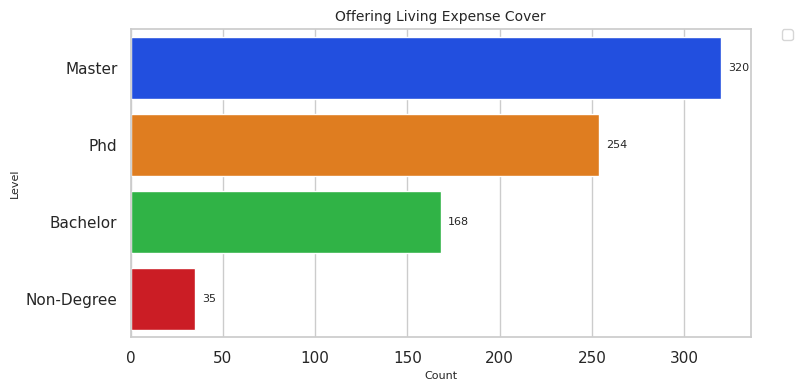

In [37]:
# Groupby University dan Major yang memberikan accommodation cover
lev_living_cover = df[df['Living Expense Covered?'] == 1].groupby(['Level']).size().reset_index(name='Count').sort_values('Count', ascending=False)
# Plot the data using a barplot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=lev_living_cover, x='Count', y='Level', dodge=False, orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge', fontsize=8, padding=5)
plt.xlabel('Count', fontsize=8)
plt.ylabel('Level', fontsize=8)
plt.title('Offering Living Expense Cover', fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

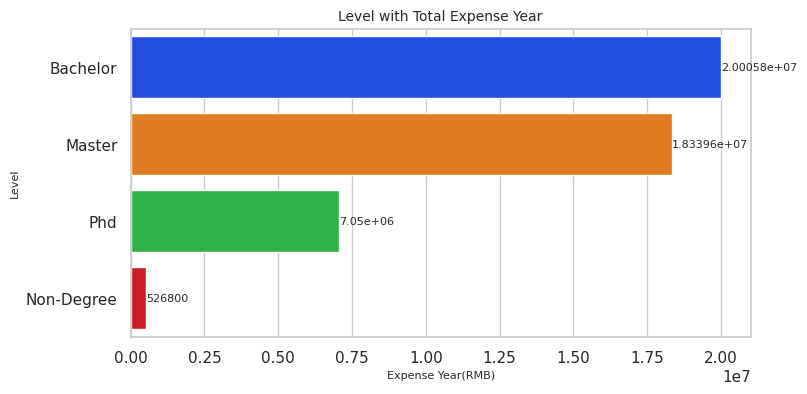

In [38]:
# Group data by Level and calculate the sum of Total Expense Year
level_expense = df.groupby('Level')['total_expense_year'].sum().reset_index().sort_values('total_expense_year', ascending=False)
# Create a h bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=level_expense, y='Level', x='total_expense_year', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Level with Total Expense Year', fontsize=10)
plt.xlabel('Expense Year(RMB)', fontsize=8)
plt.ylabel('Level', fontsize=8)
plt.show()

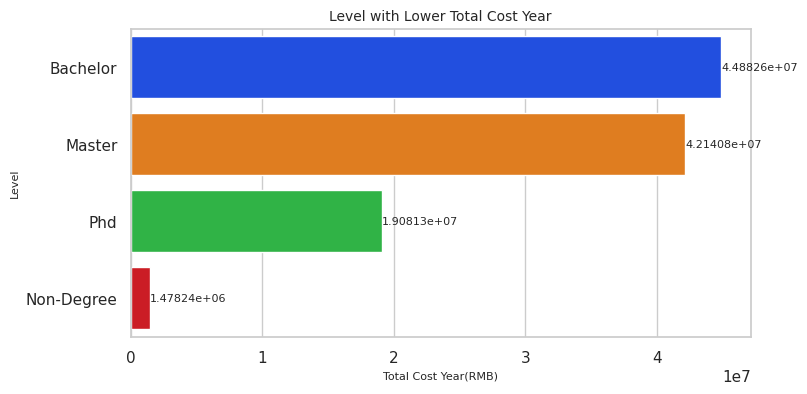

In [39]:
# Group data by Level and calculate the sum of Total Cost Year
Level_cost = df.groupby('Level')['total_cost_year'].sum().reset_index().sort_values('total_cost_year', ascending=False)
# Create a h bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=Level_cost, y='Level', x='total_cost_year', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Level with Lower Total Cost Year', fontsize=10)
plt.xlabel('Total Cost Year(RMB)', fontsize=8)
plt.ylabel('Level', fontsize=8)
plt.show()

# Insight in Level

* Based on the distribution of scholarship offerings by level, it can be concluded that Master's and Bachelor's levels are the most popular among universities in terms of providing scholarships. This is evidenced by the highest Tuition Covered and Accommodation Covered for these levels, indicating the high demand for these levels among international students seeking scholarships in China. However, it should be noted that the high scholarship coverage for these levels also results in the highest Total Accommodation Year, Total Living Year, and Total Cost Year among all levels. 

* Additionally, although the Ph.D. level ranks third in terms of the number of universities offering scholarships at this level, it is the second level with the highest Total Living Expense after the Master's level. This suggests that international students seeking scholarships at the Ph.D. level should be prepared to bear a significant portion of their living expenses while pursuing their studies in China.

# Distribution Language

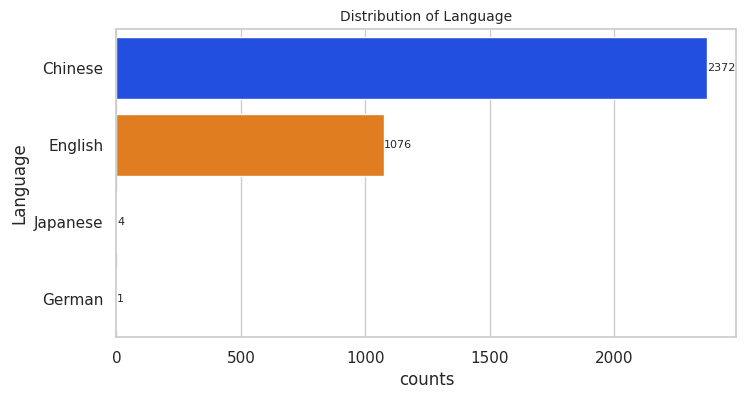

In [40]:
lan = df.groupby('Language').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=lan, x='counts', y='Language',orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.title('Distribution of Language', fontsize=10)
plt.show()

In [41]:
df.loc[df['Language'] == 'Japanese', ['University', 'Major','Level','Language']]

,University,Major,Level,Language
1024,Tianjin Foreign Studies University,Finance,Bachelor,Japanese
1927,Ningbo University,Japanese Linguistics and Literature,Master,Japanese
1931,Ningbo University,Japanese Linguistics and Literature,Master,Japanese
1938,Ningbo University,Japanese Linguistics and Literature,Master,Japanese


In [42]:
df.loc[df['Language'] == 'German', ['University', 'Major','Level','Language']]

,University,Major,Level,Language
1911,Ningbo University,German Linguistics and Literature,Master,German


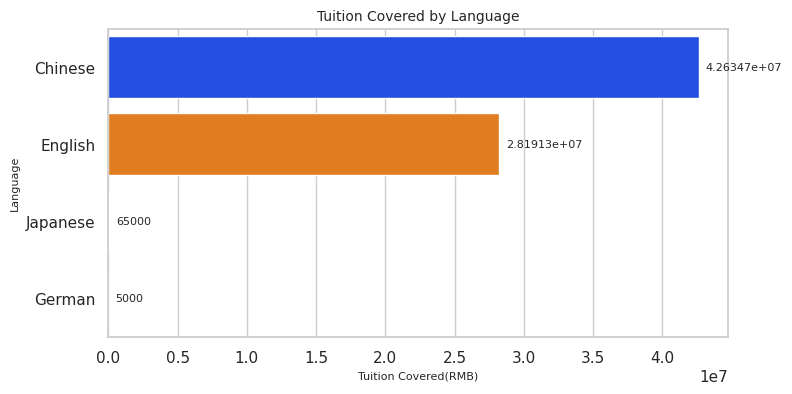

In [43]:
# Groupby Language and Calculate sum of Tuition Covered
language_tuition_covered = df.groupby('Language')['Tuition Covered'].sum().reset_index().sort_values('Tuition Covered', ascending=False)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=language_tuition_covered, x='Tuition Covered', y='Language',orient='h')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8, padding=5)
plt.title('Tuition Covered by Language', fontsize=10)
plt.xlabel('Tuition Covered(RMB)', fontsize=8)
plt.ylabel('Language', fontsize=8)
plt.show()

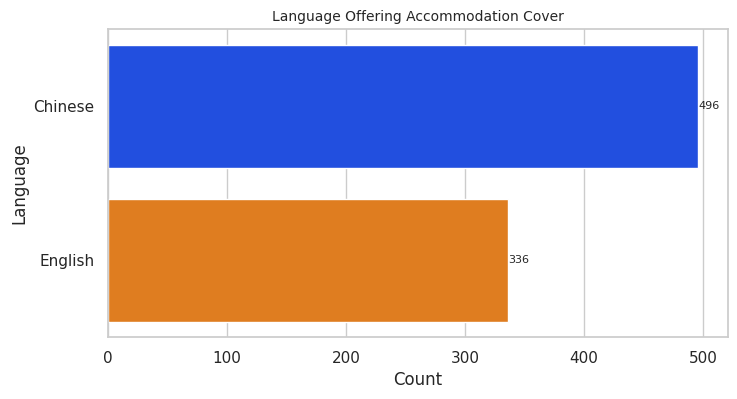

In [44]:
# Groupby Language Offering Accomodation Cover
Lan_accommodation_cover = df[df['Accomodation covered?'] == 1].groupby('Language').size().reset_index(name='Count').sort_values('Count', ascending=False)
# Plot the data using a h barplot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=Lan_accommodation_cover, y='Language', x='Count')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.title('Language Offering Accommodation Cover', fontsize=10)
plt.show()

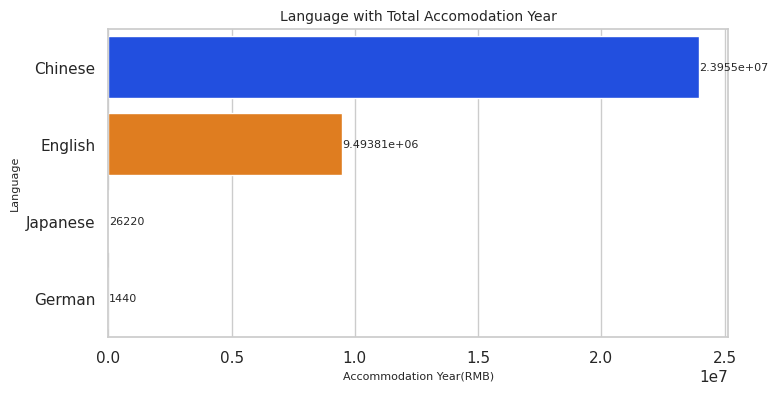

In [45]:
# Group data by Language and calculate the sum of Total Accommodation Year
lan_accomodation = df.groupby('Language')['total_accomodation_year'].sum().reset_index().sort_values('total_accomodation_year', ascending=False)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=lan_accomodation, y='Language', x='total_accomodation_year', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Language with Total Accomodation Year', fontsize=10)
plt.xlabel('Accommodation Year(RMB)', fontsize=8)
plt.ylabel('Language', fontsize=8)
plt.show()

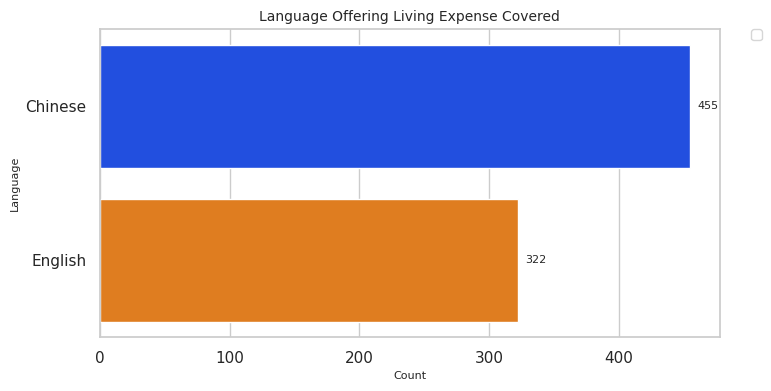

In [46]:
# Groupby Language offering Living Expense Covere
lan_living_cover = df[df['Living Expense Covered?'] == 1].groupby(['Language']).size().reset_index(name='Count').sort_values('Count', ascending=False)
plt.figure(figsize=(8,4))
ax = sns.barplot(data=lan_living_cover, x='Count', y='Language', dodge=False, orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge', fontsize=8, padding=5)
plt.xlabel('Count', fontsize=8)
plt.ylabel('Language', fontsize=8)
plt.title('Language Offering Living Expense Covered', fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

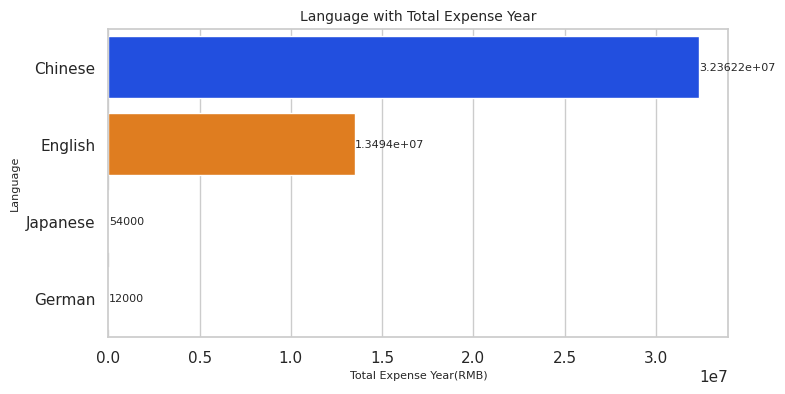

In [47]:
# Group data by Language and calculate the sum of Total Expense Year
lan_living = df.groupby('Language')['total_expense_year'].sum().reset_index().sort_values('total_expense_year', ascending=False)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=lan_living, y='Language', x='total_expense_year', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Language with Total Expense Year', fontsize=10)
plt.xlabel('Total Expense Year(RMB)', fontsize=8)
plt.ylabel('Language', fontsize=8)
plt.show()

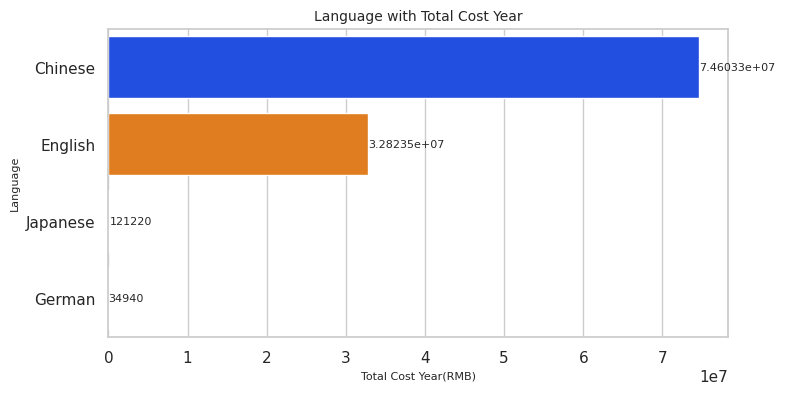

In [48]:
# Group data by Language and calculate the sum of Total Cost Year
lan_cost = df.groupby('Language')['total_cost_year'].sum().reset_index().sort_values('total_cost_year', ascending=False)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=lan_cost, y='Language', x='total_cost_year', orient='h')
for i in ax.containers:
  ax.bar_label(i, label_type='edge',fontsize=8)
plt.title('Language with Total Cost Year', fontsize=10)
plt.xlabel('Total Cost Year(RMB)', fontsize=8)
plt.ylabel('Language', fontsize=8)
plt.show()

# Distribution Scholarship Category

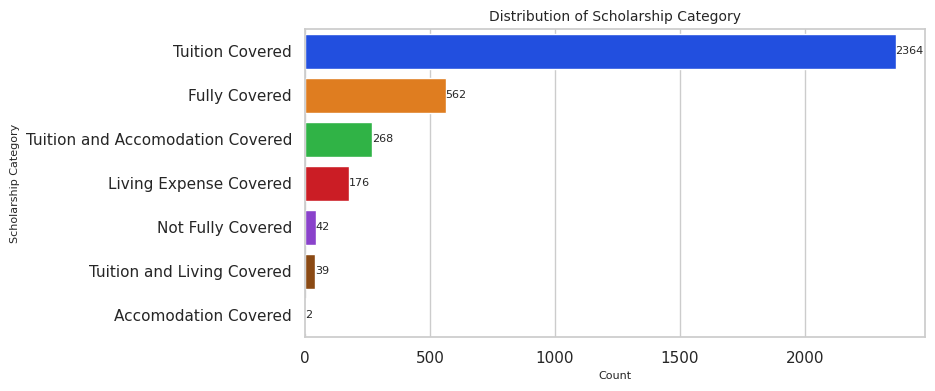

In [49]:
sch = df.groupby('Scholarship Category').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=sch, x='counts', y='Scholarship Category',orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.ylabel('Scholarship Category', fontsize=8)
plt.xlabel('Count', fontsize=8)
plt.title('Distribution of Scholarship Category', fontsize=10)
plt.show()

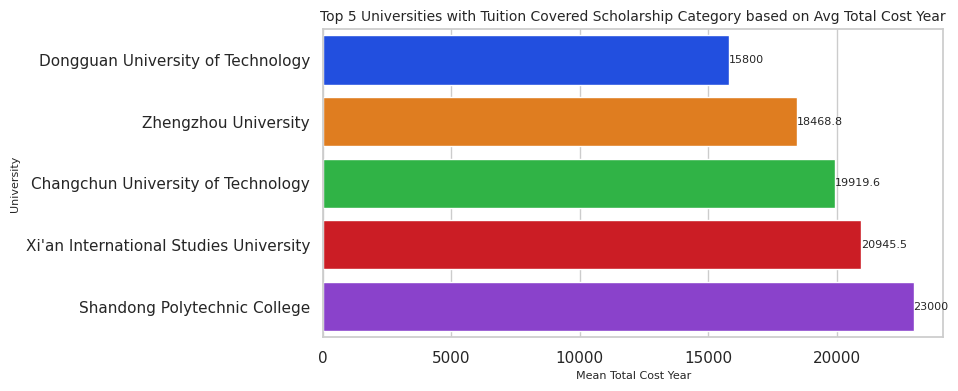

In [50]:
uni_tuition_covered = df[df["Scholarship Category"] == "Tuition Covered"].groupby("University")["total_cost_year"].mean().reset_index().sort_values(by="total_cost_year", ascending=True).head(5)
# Create bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=uni_tuition_covered, x="total_cost_year", y="University", orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.title("Top 5 Universities with Tuition Covered Scholarship Category based on Avg Total Cost Year", fontsize=10)
plt.xlabel("Mean Total Cost Year", fontsize=8)
plt.ylabel("University", fontsize=8)
plt.show()

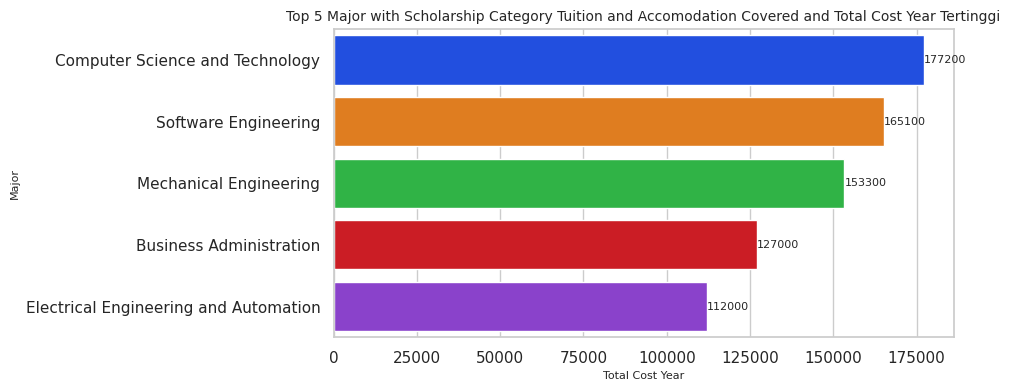

In [51]:
# filter data scholarship category == Not Fully Covered
maj_tui_acc_covered = df[df['Scholarship Category'] == 'Tuition and Accomodation Covered'].groupby("Major")["total_cost_year"].sum().reset_index().sort_values('total_cost_year', ascending=False).head(5)
plt.figure(figsize=(8,4))
ax = sns.barplot(data=maj_tui_acc_covered, x= 'total_cost_year', y= 'Major', orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.xlabel('Total Cost Year', fontsize=8)
plt.ylabel('Major',fontsize=8)
plt.title('Top 5 Major with Scholarship Category Tuition and Accomodation Covered and Total Cost Year Tertinggi', fontsize=10)
plt.show()

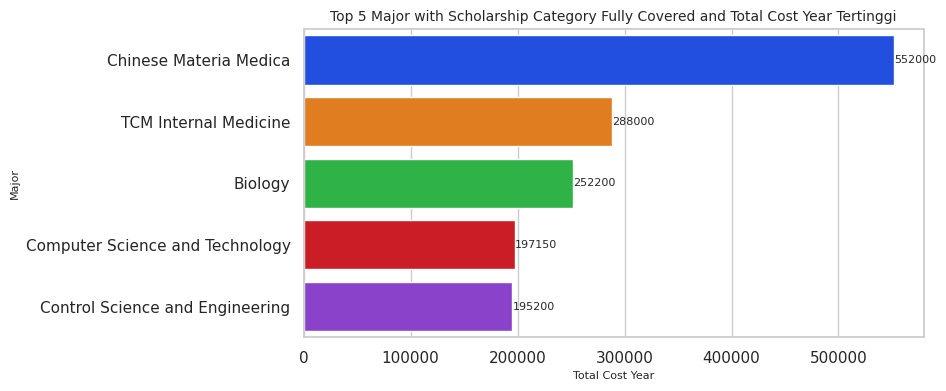

In [52]:
# filter data scholarship category == Not Fully Covered
maj_fully_covered = df[df['Scholarship Category'] == 'Fully Covered'].groupby("Major")["total_cost_year"].sum().reset_index().sort_values('total_cost_year', ascending=False).head(5)
plt.figure(figsize=(8,4))
ax = sns.barplot(data=maj_fully_covered, x= 'total_cost_year', y= 'Major', orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize=8)
plt.xlabel('Total Cost Year', fontsize=8)
plt.ylabel('Major',fontsize=8)
plt.title('Top 5 Major with Scholarship Category Fully Covered and Total Cost Year Tertinggi', fontsize=10)
plt.show()

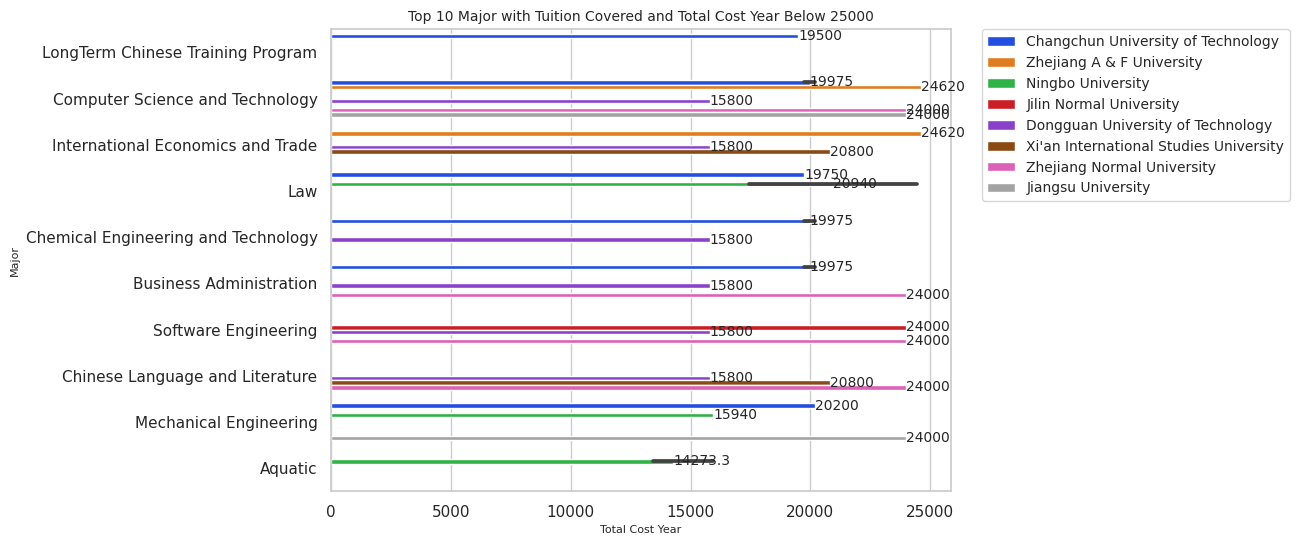

In [53]:
maj_tui_cost_cov = df[(df['Scholarship Category']=='Tuition Covered') & (df['total_cost_year']<25000)]

# Ambil 10 major dengan total cost year tertinggi
major_count = maj_tui_cost_cov['Major'].value_counts()[:10].index.tolist()

# Filter data untuk major yang terpilih
plot_data = maj_tui_cost_cov[maj_tui_cost_cov['Major'].isin(major_count)]

# Plot data menggunakan seaborn
plt.figure(figsize=(8,6))
ax = sns.barplot(x='total_cost_year', y='Major', hue='University', data=plot_data, orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize = 10)
plt.xlabel('Total Cost Year',fontsize=8)
plt.ylabel('Major',fontsize=8)
plt.title('Top 10 Major with Tuition Covered and Total Cost Year Below 25000',fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

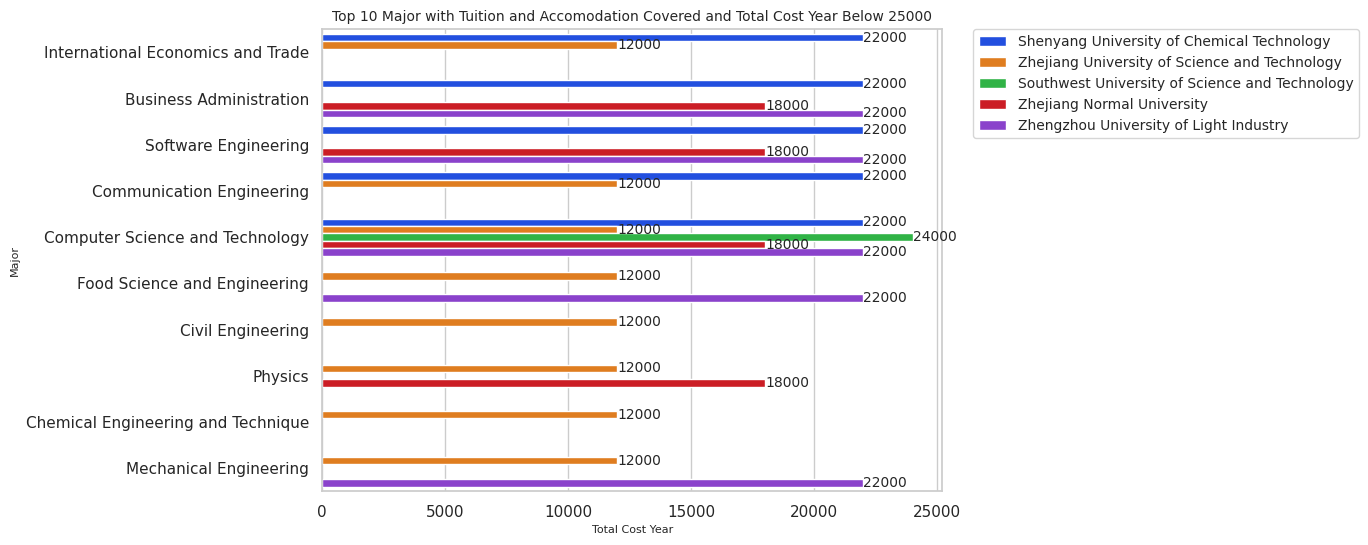

In [54]:
maj_tui_acc_cov = df[(df['Scholarship Category']=='Tuition and Accomodation Covered') & (df['total_cost_year']<25000)]

# Ambil 10 major dengan total cost year tertinggi
major_count = maj_tui_acc_cov['Major'].value_counts()[:10].index.tolist()

# Filter data untuk major yang terpilih
maj_tui_acc = maj_tui_acc_cov[maj_tui_acc_cov['Major'].isin(major_count)]

# Plot data menggunakan seaborn
plt.figure(figsize=(8,6))
ax = sns.barplot(x='total_cost_year', y='Major', hue='University', data=maj_tui_acc, orient='h')
for i in ax.containers:
  ax.bar_label(i,fontsize = 10)
plt.xlabel('Total Cost Year',fontsize=8)
plt.ylabel('Major',fontsize=8)
plt.title('Top 10 Major with Tuition and Accomodation Covered and Total Cost Year Below 25000',fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

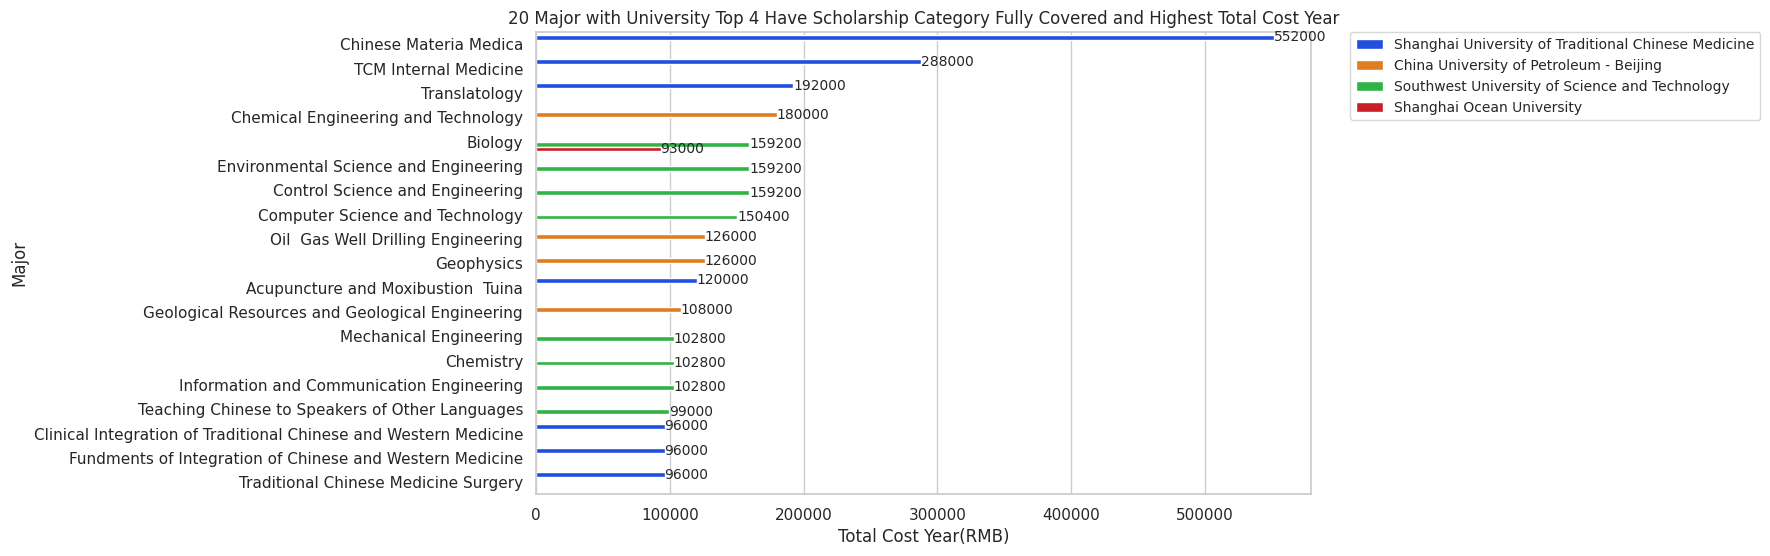

In [55]:
uni_maj_fully_covered = df[(df['Scholarship Category'] == 'Fully Covered')].groupby(['University', 'Major'])['total_cost_year'].sum().reset_index().sort_values('total_cost_year', ascending=False).head(20)
plt.figure(figsize=(10,6))
ax = sns.barplot(x='total_cost_year', y='Major', hue='University', data=uni_maj_fully_covered, orient='h')
for i in ax.containers:
  ax.bar_label(i, fontsize=10)
plt.xlabel('Total Cost Year(RMB)')
plt.ylabel('Major')
plt.title('20 Major with University Top 4 Have Scholarship Category Fully Covered and Highest Total Cost Year')
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

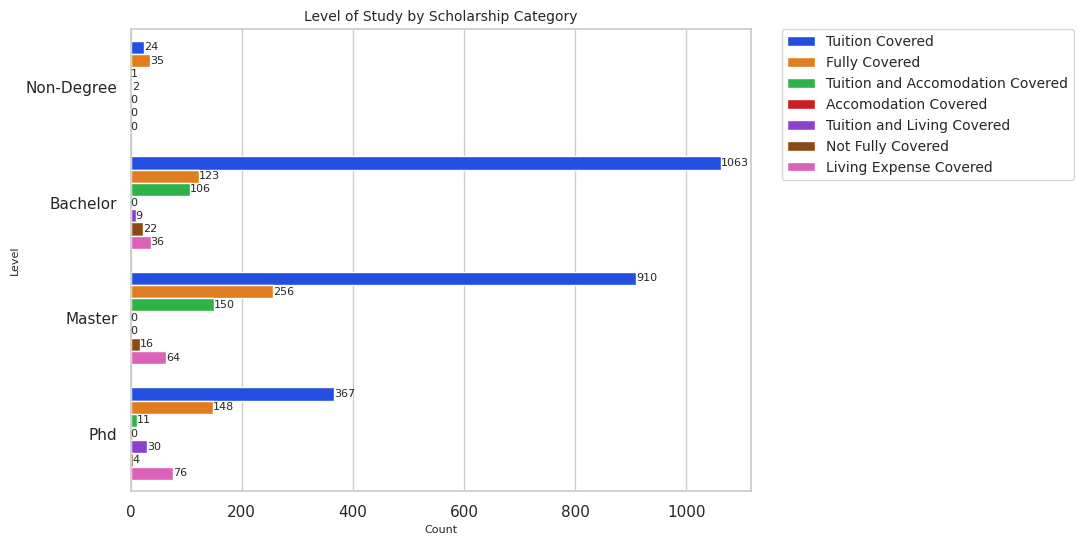

In [56]:
plt.figure(figsize=(8,6))
ax = sns.countplot(y='Level', data=df, orient='h', hue='Scholarship Category')
for i in ax.containers:
  ax.bar_label(i, fontsize=8)
plt.xlabel('Count',fontsize=8)
plt.ylabel('Level',fontsize=8)
plt.title('Level of Study by Scholarship Category', fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

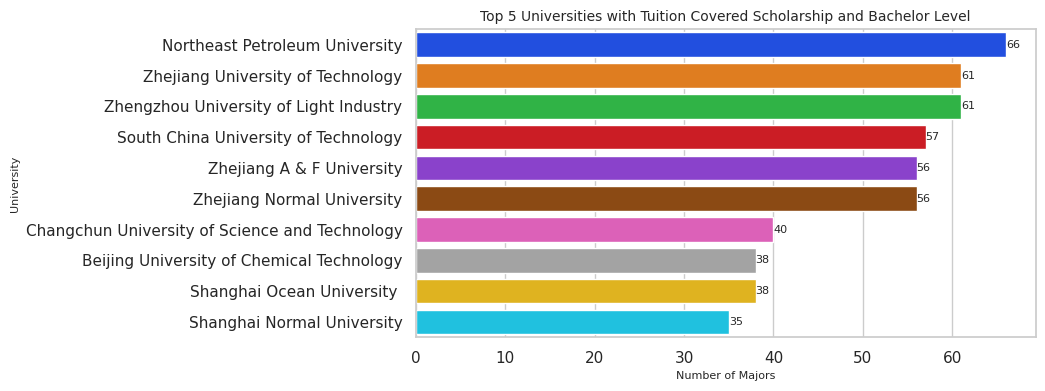

In [57]:
filtered_Bachelor = df[(df['Scholarship Category'] == 'Tuition Covered') & 
                       (df['Level'] == 'Bachelor')].pivot_table(index='University', values='Major', aggfunc=pd.Series.nunique).nlargest(10, 'Major')
# Plot the data
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=filtered_Bachelor, x='Major', y=filtered_Bachelor.index, orient='h')
for i in ax.containers:
  ax.bar_label(i, fontsize=8)
plt.xlabel('Number of Majors', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.title('Top 5 Universities with Tuition Covered Scholarship and Bachelor Level', fontsize=10)
plt.show()

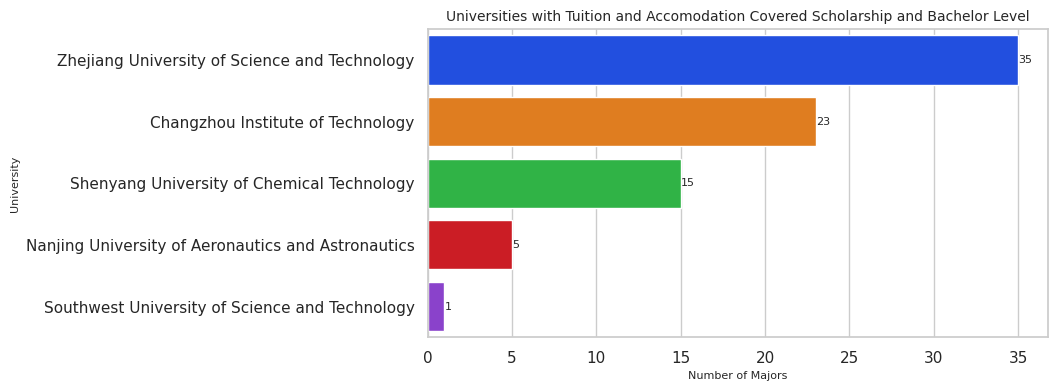

In [58]:
filtered_bachelor = df[(df['Scholarship Category'] == 'Tuition and Accomodation Covered') & 
                       (df['Level'] == 'Bachelor')].pivot_table(index='University', values='Major', aggfunc=pd.Series.nunique).nlargest(10, 'Major')
# Plot the data
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=filtered_bachelor, x='Major', y=filtered_bachelor.index, orient='h')
for i in ax.containers:
  ax.bar_label(i, fontsize=8)
plt.xlabel('Number of Majors', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.title('Universities with Tuition and Accomodation Covered Scholarship and Bachelor Level', fontsize=10)
plt.show()

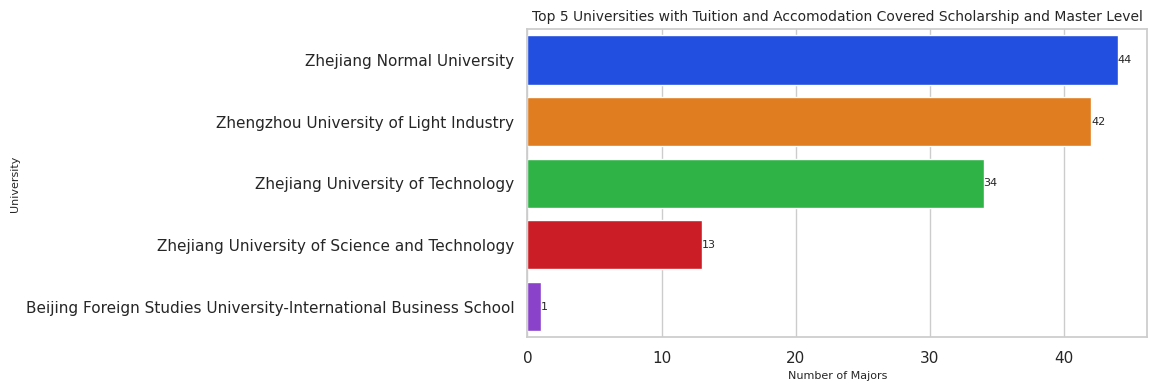

In [59]:
filtered_Master = df[(df['Scholarship Category'] == 'Tuition and Accomodation Covered') & 
                     (df['Level'] == 'Master')].pivot_table(index='University', values='Major', aggfunc=pd.Series.nunique).nlargest(10, 'Major')
# Plot the data
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=filtered_Master, x='Major', y=filtered_Master.index, orient='h')
for i in ax.containers:
  ax.bar_label(i, fontsize=8)
plt.xlabel('Number of Majors', fontsize=8)
plt.ylabel('University',fontsize=8)
plt.title('Top 5 Universities with Tuition and Accomodation Covered Scholarship and Master Level', fontsize=10)
plt.show()

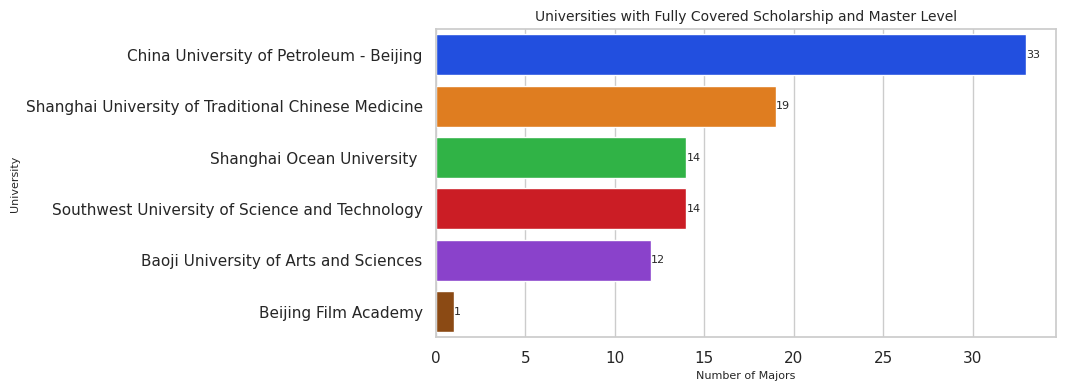

In [60]:
filtered_master = df[(df['Scholarship Category'] == 'Fully Covered') & 
                     (df['Level'] == 'Master')].pivot_table(index='University', values='Major', aggfunc=pd.Series.nunique).nlargest(10, 'Major')
# Plot the data
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=filtered_master, x='Major', y=filtered_master.index, orient='h')
for i in ax.containers:
  ax.bar_label(i, fontsize=8)
plt.xlabel('Number of Majors', fontsize=8)
plt.ylabel('University',fontsize=8)
plt.title('Universities with Fully Covered Scholarship and Master Level', fontsize=10)
plt.show()

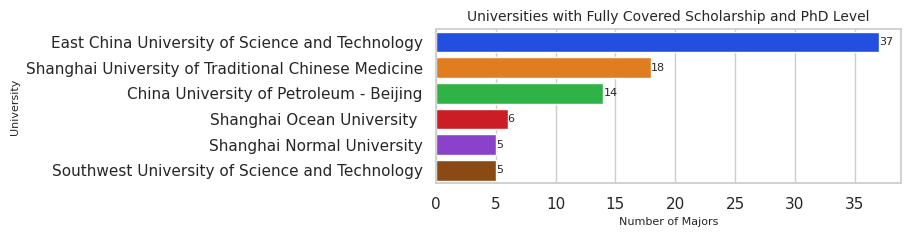

In [61]:
filtered_phd = df[(df['Scholarship Category'] == 'Fully Covered') & 
                       (df['Level'] == 'Phd')].pivot_table(index='University', values='Major', aggfunc=pd.Series.nunique).nlargest(10, 'Major')
# Plot the data
plt.figure(figsize=(6, 2))
ax = sns.barplot(data=filtered_phd, x='Major', y=filtered_phd.index, orient='h')
for i in ax.containers:
  ax.bar_label(i, fontsize=8)
plt.xlabel('Number of Majors', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.title('Universities with Fully Covered Scholarship and PhD Level', fontsize=10)
plt.show()

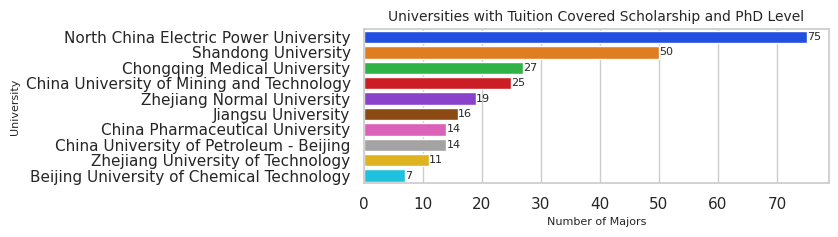

In [62]:
filtered_phd = df[(df['Scholarship Category'] == 'Tuition Covered') & 
                       (df['Level'] == 'Phd')].pivot_table(index='University', values='Major', aggfunc=pd.Series.nunique).nlargest(10, 'Major')
# Plot the data
plt.figure(figsize=(6, 2))
ax = sns.barplot(data=filtered_phd, x='Major', y=filtered_phd.index, orient='h')
for i in ax.containers:
  ax.bar_label(i, fontsize=8)
plt.xlabel('Number of Majors', fontsize=8)
plt.ylabel('University', fontsize=8)
plt.title('Universities with Tuition Covered Scholarship and PhD Level', fontsize=10)
plt.show()

# Insight Scholarship Category

* From the distribution of the Scholarship Category column, it can be concluded that more than 50% of universities offer scholarships that only cover tuition fees, followed by the Fully Covered and Tuition and Accommodation Covered categories. Moreover, Dongguan University of Technology and Zhengzhou University are universities that offer Tuition Covered scholarships with the lowest average total cost per year.

* Furthermore, Bachelor's level has the highest total Tuition Covered, the Master's level has the most Fully Covered scholarships, and the Ph.D. level has the most Living Expense Covered scholarships. Thus, the distribution between Level and Scholarship Category can be seen.

* However, from the distribution of University, Level, and Scholarship Categories, it can be seen that Northeast Petroleum University has the most majors offering Tuition Covered scholarships at the Bachelor's level, while the Zhejiang University of Technology has the most scholarships for Tuition and Accommodation Covered at Bachelor's level.

* In addition, China University of Petroleum - Beijing has the most Fully Covered scholarships at the Master's level, and Zhejiang Normal University has the most scholarships for Tuition and Accommodation Covered at the Master's level. 

* Finally, at the Ph.D. level, East China University of Science and Technology has the most Fully Covered scholarships, while North China Electric Power University has the most Tuition Covered scholarships.

# Filtered Data

In [63]:
#Created Data Level Bachelor For University and Student Not Pay Tuition, Accomodation, Living (Fully Covered)
filtered_data_Bachelor = df[(df['Level'] == 'Bachelor') & (df['Scholarship Category'] == 'Fully Covered') & (df['total_cost_year'] == 0)][['University', 'Major','Level','total_cost_year']].sort_values('University',ascending=True)
print('University and Major in Bachelor Level With Total Cost Year 0')
filtered_data_Bachelor

University and Major in Bachelor Level With Total Cost Year 0


,University,Major,Level,total_cost_year
1067,Shantou University Medical College,Clinical Medicine,Bachelor,0.0
1066,Shantou University Medical College,Nursing,Bachelor,0.0
640,University of Science and Technology Beijing,Civil Engineering,Bachelor,0.0
639,University of Science and Technology Beijing,Safety Engineering,Bachelor,0.0
638,University of Science and Technology Beijing,Metallurgical Engineering,Bachelor,0.0
637,University of Science and Technology Beijing,Internet of Things,Bachelor,0.0
636,University of Science and Technology Beijing,Logistics Engineering,Bachelor,0.0
635,University of Science and Technology Beijing,Industrial Design,Bachelor,0.0
626,University of Science and Technology Beijing,Information Management and Information Systems,Bachelor,0.0
633,University of Science and Technology Beijing,Measuring Technology and Instrument,Bachelor,0.0


In [64]:
filtered_data_Master = df[(df['Level'] == 'Master') & (df['Scholarship Category'] == 'Fully Covered') & (df['total_cost_year'] == 0)][['University', 'Major','Level','total_cost_year']].sort_values('University',ascending=True)
print('University and Major in Master Level With Total Cost Year 0')
filtered_data_Master

University and Major in Master Level With Total Cost Year 0


,University,Major,Level,total_cost_year
1491,Baoji University of Arts and Sciences,Chinese Language and Literature,Master,0.0
1517,Baoji University of Arts and Sciences,Fine Arts,Master,0.0
1516,Baoji University of Arts and Sciences,Mechanical Engineering,Master,0.0
1515,Baoji University of Arts and Sciences,Geographical Science,Master,0.0
1514,Baoji University of Arts and Sciences,Chemistry,Master,0.0
...,...,...,...,...
2562,Shanghai University of Traditional Chinese Med...,TCM Internal Medicine,Master,0.0
2563,Shanghai University of Traditional Chinese Med...,Rehabilitation of Integration of Chinese and W...,Master,0.0
2564,Shanghai University of Traditional Chinese Med...,TCM Internal Medicine,Master,0.0
2594,Shanghai University of Traditional Chinese Med...,Chinese Herbal Formulae,Master,0.0


In [65]:
filtered_data_Phd = df[(df['Level'] == 'Phd') & (df['Scholarship Category'] == 'Fully Covered') & (df['total_cost_year'] == 0)][['University', 'Major','Level','total_cost_year']].sort_values('total_cost_year',ascending=True)
print('University and Major in PhD Level With Total Cost Year 0')
filtered_data_Phd

University and Major in PhD Level With Total Cost Year 0


,University,Major,Level,total_cost_year
3014,East China University of Science and Technology,Social Work,Phd,0.0
3554,East China University of Science and Technology,Computer Application Technology,Phd,0.0
3553,East China University of Science and Technology,Thermal Engineering,Phd,0.0
3552,East China University of Science and Technology,Environmental Science and Engineering,Phd,0.0
3551,East China University of Science and Technology,Pharmacy,Phd,0.0
...,...,...,...,...
3042,East China University of Science and Technology,Biochemical Engineering,Phd,0.0
3041,East China University of Science and Technology,Biochemistry and Molecular Biology,Phd,0.0
3040,East China University of Science and Technology,Control Science Engineering,Phd,0.0
3038,East China University of Science and Technology,Industrial Design,Phd,0.0


In [66]:
#Created University, Major, Level, and Not Fully Covered Below 50.000(RMB). Because 75% Total Cost Year is 50.000 and Students can prepare of fees
filtered_data_uni = df[(df['Scholarship Category'] == 'Not Fully Covered') & (df['total_cost_year'] < 50000)][['University', 'Major','Level','total_cost_year']]
print('Univerisy, Major, and Level With Not Fully Covered Scholarship Category\n Total Cost Year Below 50.000(RMB)\n')
filtered_data_uni

Univerisy, Major, and Level With Not Fully Covered Scholarship Category
 Total Cost Year Below 50.000(RMB)



,University,Major,Level,total_cost_year
906,Tianjin Foreign Studies University,International Business,Bachelor,39900.0
908,Tianjin Foreign Studies University,International Economics Trade,Bachelor,39900.0
995,Tianjin Foreign Studies University,Financial Management,Bachelor,39900.0
1022,Tianjin Foreign Studies University,Tourism Management,Bachelor,39900.0
1023,Tianjin Foreign Studies University,Finance,Bachelor,39900.0
1024,Tianjin Foreign Studies University,Finance,Bachelor,39900.0
1025,Tianjin Foreign Studies University,Chinese Language and Literature,Bachelor,39900.0
1065,Tianjin Foreign Studies University,Advertising,Bachelor,39900.0
1268,Tianjin Foreign Studies University,Journalism Communication,Bachelor,39900.0
1269,Tianjin Foreign Studies University,International Politics,Bachelor,39900.0


# Conclusion

* In conclusion, from this dataset, we can see trends in the type and scope of University, scholarships offered, as well as majors, education levels, languages of instruction, and the year in which the scholarship program is held. This dataset can also help prospective students find scholarship programs that match their needs.
*  Tianjin Foreign Studies University can be a solution for those who are looking for a scholarship program that covers only partial tuition fees and living expenses. This is because the university offers relatively lower total costs compared to other universities, even when including tuition fees, accommodation, and living expenses.Additionally, the university also offers a wide range of majors, making it a suitable choice for students with various academic backgrounds. However, it is important to note that other factors, such as the quality of education, location, and cultural fit, should also be taken into consideration when choosing a university.
* Based on the results, for Bachelor's Degree scholarship seekers who are looking for Fully Covered and Total Cost Year 0 scholarships, there are two options: Shantou University Medical College and University of Science and Technology in Beijing. However, Shantou University only offers two majors, while the University of Science and Technology in Beijing has many majors to choose from. Therefore, for those who are interested in health services or medical majors, Shantou University Medical College is a good option. On the other hand, for those who have other interests, the University of Science and Technology in Beijing can provide more options.
* Based on the analysis, we can conclude that there are three universities that provide Fully Covered scholarships and 0 Year Total Fees for Master's Degree scholarship seekers, namely Shanghai University of Traditional Chinese Medicine, Baoji University of Arts and Sciences, and Beijing Film Academy. The choice of university depends on the individual's interests and career goals. For those interested in healthcare or medicine, Shanghai University of Traditional Chinese Medicine is recommended. Meanwhile, for those who are interested in Science or Film, Baoji University of Arts and Sciences and Beijing Film Academy respectively can offer more options. It is important for scholarship seekers to carefully consider the major offered by each university and its relevance to their career goals.
* Based on the analysis, it can be concluded that for Ph.D. degree scholarship seekers who are looking for fully covered scholarships and zero-year total fees, there are two universities that offer such scholarships. These universities are East China University of Science and Technology and Southwest University of Science and Technology. However, the choice between these two universities may depend on the field of study that the scholarship seeker is interested in. For those who are interested in Science and Technology fields, such as Chemistry, Engineering, and Industrial East China University of Science and Technology may be the better choice. On the other hand, for those who are interested in other fields, such as Humanities, Social Sciences, or Arts, Southwest University of Science and Technology may be a better fit.
* Overall, both Tianjin Foreign Studies University, Shantou University Medical College, University of Science and Technology Beijing, Baoji University of Arts and Sciences, Beijing Film Academy, Shanghai University of Traditional Chinese Medicine, East China University of Science and Technology, and Southwest University of Science and Technology are good options for Bachelor, Master, Ph.D. degree scholarship seekers who are looking for fully covered scholarships with zero-year total fees. The final choice between these all universities may depend on the individual's field of study and personal preferences.
* At least but not least, As the classical saying goes, "Pursue knowledge even unto China.". It can be concluded that China is an attractive study destination for international students looking for scholarships. Some of the favorite universities and majors for scholarship recipients can be options for prospective international students who want to continue their studies in China with a scholarship. Additionally, it should be noted that most scholarships awarded only cover tuition fees, so it is necessary to be well-prepared to bear the cost of accommodation and living expenses during studies in China. the analysis provides valuable insights into the costs of studying in China for international students and can be used as a reference for those who are planning to pursue higher education in China.

# **Every Distribution Analysis Depicts The Process to Obtain a Favorable Outcome.**

**In conclusion, this notebook provides valuable insights into the distribution of international students, majors, levels, and scholarship categories among universities in China. The findings can serve as a reference for students who are considering pursuing higher education in China. If you found this notebook helpful, please consider upvoting it. Your support would be greatly appreciated.**